# AngelHack Monthly Code Challenge

# April 2023 Challenge Statement

### 🎨Theme: **“Data Visualization and Storytelling”**

📊Dataset: [https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023](https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023)



# Table of contents

### [1. Introduction](#introduction)
1.1. Project overview

1.2. Problem statement


### [2. Start Comet experiment](#scomet)
### [3. Package and module imports](#pack)
### [4. Load data](#load)
### [5. Description of the data](#dod)
### [6. Data pre-processing](#cleaning)


### [7. Exploratory Data Analysis](#eda)

### [8. Feature engineering](#pp)


In [296]:
## 1.Introduction

## 1. Introduction

THE World University Rankings provide the definitive list of the world’s best universities, with an emphasis on the research mission. It is the only global university league table to judge research-intensive universities across all of their core missions: 

* teaching (the learning environment); research (volume, income and reputation); 
* citations (research influence); industry income (knowledge transfer) and 
* international outlook (staff, students and research). 

<h3> 1.1 It uses 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons. The overall list is accompanied by 11 subject-specific rankings.</h3>

* Arts & humanities
* Business & economics
* Education
* Law
* Social sciences
* Computer science
* Engineering
* Clinical & health
* Life sciences
* Physical sciences
* Psychology


## 1.3 Problem statement
Easy to comprehend data visualization on University Rank Data.

<a id="pack"></a>
# 2. Package and module imports

Install and run all dependencies that the notebook requires to run successfully. 

In [297]:
# Exploratory Data Analysis
import pickle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime
from time import time
import scipy as sp
import operator  
import heapq
from wordcloud import WordCloud, STOPWORDS

import plotly.express as px

# matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Data Preprocessing
import random
import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

        
# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

<a id="load"></a>
# 3. Load dataset

### 2011 Data

In [298]:
df_2011 = pd.read_csv('./data/2011_rankings.csv')
df_2011.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
1,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
3,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,5,5,Princeton University,94.2,5,90.9,6,70.3,53,-,164,95.4,5,99.9,3,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False


In [299]:
# Specify the path to the CSV file
file_path = './data/2011_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2011 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2011['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2011)

     rank_order  rank                                         name  \
0             1     1                           Harvard University   
1             2     2           California Institute of Technology   
2             3     3        Massachusetts Institute of Technology   
3             4     4                          Stanford University   
4             5     5                         Princeton University   
..          ...   ...                                          ...   
195         196   196                        Kent State University   
196         197   197               University of Illinois Chicago   
197         197   197                          Zhejiang University   
198         199   199                      Simon Fraser University   
199         199   199  Swedish University of Agricultural Sciences   

     scores_overall  scores_overall_rank  scores_teaching  \
0              96.1                    1             99.7   
1              96.0                  

In [300]:
df_2011.info()
df_2011.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         200 non-null    int64  
 1   rank                               200 non-null    int64  
 2   name                               200 non-null    object 
 3   scores_overall                     200 non-null    float64
 4   scores_overall_rank                200 non-null    int64  
 5   scores_teaching                    200 non-null    float64
 6   scores_teaching_rank               200 non-null    int64  
 7   scores_international_outlook       200 non-null    object 
 8   scores_international_outlook_rank  200 non-null    int64  
 9   scores_industry_income             200 non-null    object 
 10  scores_industry_income_rank        200 non-null    int64  
 11  scores_research                    200 non-null    float64

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_international_outlook         0
scores_international_outlook_rank    0
scores_industry_income               0
scores_industry_income_rank          0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
location                             0
aliases                              0
subjects_offered                     2
closed                               0
unaccredited                         0
Date                                 0
dtype: int64

In [301]:
# Drop any rows with missing values
df_2011 = df_2011.dropna()

# Drop any duplicate rows
df_2011 = df_2011.drop_duplicates()

df_2011.replace('-', np.nan, inplace=True)


df_2011 = df_2011.dropna()
df_2011

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2011
1,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2011
2,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2011
3,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2011
5,6,6,University of Oxford,91.2,7,88.2,9,77.2,42,73.5,28,93.9,8,95.1,22,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,193,193,KTH Royal Institute of Technology,46.8,194,49.1,119,64.2,63,100.0,4,56.2,70,29.2,199,Sweden,KTH Royal Institute of Technology,"Business & Management,Mechanical & Aerospace E...",False,False,2011
194,195,195,University of Vienna,46.7,195,47.6,129,63.2,68,27.0,136,45.7,143,45.6,184,Austria,University of Vienna,"Communication & Media Studies,Education,Law,Ec...",False,False,2011
195,196,196,Kent State University,46.5,196,33.5,196,15.9,191,26.3,139,33.3,197,76.8,83,United States,Kent State University,"Physics & Astronomy,Geography,Mechanical & Aer...",False,False,2011
197,197,197,Zhejiang University,46.4,198,54.6,87,29.6,155,70.3,31,41.3,169,44.3,190,China,Zhejiang University ZJU Zhejiang University Ch...,"Architecture,Other Health,Biological Sciences,...",False,False,2011


### 2012 Data

In [302]:
df_2012 = pd.read_csv('./data/2012_rankings.csv')
df_2012.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,1,1,California Institute of Technology,94.8,1,95.7,2,56.0,172,97.0,26,98.2,4,99.9,3,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
1,2,2,Harvard University,93.9,2,95.8,1,67.5,115,35.9,212,97.4,5,99.8,7,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
2,2,2,Stanford University,93.9,3,94.8,3,57.2,162,63.8,74,98.9,3,99.8,8,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
3,4,4,University of Oxford,93.6,4,89.5,8,91.9,12,62.1,81,96.6,6,97.9,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
4,5,5,Princeton University,92.9,5,91.5,6,49.6,198,81.0,43,99.1,2,100.0,2,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False


In [303]:
# Specify the path to the CSV file
file_path = './data/2012_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2012 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2012['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2012)


     rank_order     rank                                name scores_overall  \
0             1        1  California Institute of Technology           94.8   
1             2        2                  Harvard University           93.9   
2             2        2                 Stanford University           93.9   
3             4        4                University of Oxford           93.6   
4             5        5                Princeton University           92.9   
..          ...      ...                                 ...            ...   
397         351  350-400                 Griffith University              -   
398         351  350-400        University of Bari Aldo Moro              -   
399         351  350-400                 Maynooth University              -   
400         351  350-400                 University of Turku              -   
401         351  350-400              Heriot-Watt University              -   

     scores_overall_rank  scores_teaching  scores_t

In [304]:
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         402 non-null    int64  
 1   rank                               402 non-null    object 
 2   name                               402 non-null    object 
 3   scores_overall                     402 non-null    object 
 4   scores_overall_rank                402 non-null    int64  
 5   scores_teaching                    402 non-null    float64
 6   scores_teaching_rank               402 non-null    int64  
 7   scores_international_outlook       402 non-null    float64
 8   scores_international_outlook_rank  402 non-null    int64  
 9   scores_industry_income             402 non-null    object 
 10  scores_industry_income_rank        402 non-null    int64  
 11  scores_research                    402 non-null    float64

In [305]:
df_2012.isnull().sum()

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_international_outlook         0
scores_international_outlook_rank    0
scores_industry_income               0
scores_industry_income_rank          0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
location                             0
aliases                              0
subjects_offered                     5
closed                               0
unaccredited                         0
Date                                 0
dtype: int64

In [306]:
# Drop any rows with missing values
df_2012 = df_2012.dropna()

# Drop any duplicate rows
df_2012 = df_2012.drop_duplicates()

In [307]:
df_2012

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,94.8,1,95.7,2,56.0,172,97.0,26,98.2,4,99.9,3,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2012
1,2,2,Harvard University,93.9,2,95.8,1,67.5,115,35.9,212,97.4,5,99.8,7,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2012
2,2,2,Stanford University,93.9,3,94.8,3,57.2,162,63.8,74,98.9,3,99.8,8,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2012
3,4,4,University of Oxford,93.6,4,89.5,8,91.9,12,62.1,81,96.6,6,97.9,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2012
4,5,5,Princeton University,92.9,5,91.5,6,49.6,198,81.0,43,99.1,2,100.0,2,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,351,350-400,Griffith University,-,233,15.7,386,79.0,64,30.7,285,16.2,338,20.3,383,Australia,Griffith University,"Physics & Astronomy,Chemistry,Architecture,Arc...",False,False,2012
398,351,350-400,University of Bari Aldo Moro,-,320,23.1,315,30.5,301,30.6,287,17.4,325,35.1,323,Italy,University of Bari Aldo Moro,"Business & Management,Veterinary Science,Commu...",False,False,2012
399,351,350-400,Maynooth University,-,274,22.9,318,74.8,80,27.1,333,18.6,310,22.1,376,Ireland,Maynooth University,"Geology, Environmental, Earth & Marine Science...",False,False,2012
400,351,350-400,University of Turku,-,381,20.4,338,41.4,242,32.3,263,21.5,275,28.9,349,Finland,University of Turku,"Accounting & Finance,Other Health,Mathematics ...",False,False,2012


In [308]:
df_2012.replace('-', np.nan, inplace=True)

In [309]:
df_2012

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,94.8,1,95.7,2,56.0,172,97.0,26,98.2,4,99.9,3,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2012
1,2,2,Harvard University,93.9,2,95.8,1,67.5,115,35.9,212,97.4,5,99.8,7,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2012
2,2,2,Stanford University,93.9,3,94.8,3,57.2,162,63.8,74,98.9,3,99.8,8,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2012
3,4,4,University of Oxford,93.6,4,89.5,8,91.9,12,62.1,81,96.6,6,97.9,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2012
4,5,5,Princeton University,92.9,5,91.5,6,49.6,198,81.0,43,99.1,2,100.0,2,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,351,350-400,Griffith University,NaN,233,15.7,386,79.0,64,30.7,285,16.2,338,20.3,383,Australia,Griffith University,"Physics & Astronomy,Chemistry,Architecture,Arc...",False,False,2012
398,351,350-400,University of Bari Aldo Moro,NaN,320,23.1,315,30.5,301,30.6,287,17.4,325,35.1,323,Italy,University of Bari Aldo Moro,"Business & Management,Veterinary Science,Commu...",False,False,2012
399,351,350-400,Maynooth University,NaN,274,22.9,318,74.8,80,27.1,333,18.6,310,22.1,376,Ireland,Maynooth University,"Geology, Environmental, Earth & Marine Science...",False,False,2012
400,351,350-400,University of Turku,NaN,381,20.4,338,41.4,242,32.3,263,21.5,275,28.9,349,Finland,University of Turku,"Accounting & Finance,Other Health,Mathematics ...",False,False,2012


In [310]:
df_2012 = df_2012.dropna()

In [311]:
df_2012

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,94.8,1,95.7,2,56.0,172,97.0,26,98.2,4,99.9,3,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2012
1,2,2,Harvard University,93.9,2,95.8,1,67.5,115,35.9,212,97.4,5,99.8,7,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2012
2,2,2,Stanford University,93.9,3,94.8,3,57.2,162,63.8,74,98.9,3,99.8,8,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2012
3,4,4,University of Oxford,93.6,4,89.5,8,91.9,12,62.1,81,96.6,6,97.9,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2012
4,5,5,Princeton University,92.9,5,91.5,6,49.6,198,81.0,43,99.1,2,100.0,2,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,194,University of Konstanz,42.5,194,29.0,244,63.7,137,49.9,111,29.7,211,62.8,163,Germany,University of Konstanz,"Art, Performing Arts & Design,Chemistry,Histor...",False,False,2012
194,195,195,Boston College,42.4,195,26.5,271,41.4,241,24.2,365,18.9,302,83.5,77,United States,Boston College,"Computer Science,Medicine & Dentistry,Physics ...",False,False,2012
195,196,196,Karlsruhe Institute of Technology,41.6,196,34.6,192,64.9,129,35.6,213,19.6,296,65.5,149,Germany,Karlsruhe Institute of Technology,"Communication & Media Studies,Mechanical & Aer...",False,False,2012
198,197,197,University of Leicester,41.5,199,27.6,265,84.9,40,34.4,234,30.3,204,56.3,196,United Kingdom,University of Leicester uk united kingdom leic...,"Biological Sciences,Languages, Literature & Li...",False,False,2012


### 2013 Data

In [312]:
df_2013 = pd.read_csv('./data/2013_rankings.csv')
df_2013.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,1,1,California Institute of Technology,95.5,1,96.3,1,59.8,145,95.6,29,99.4,1,99.7,6,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
1,2,2,Stanford University,93.7,2,95.0,2,56.6,170,62.4,88,98.8,4,99.3,8,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
2,2,2,University of Oxford,93.7,3,89.7,9,88.7,13,79.8,46,98.1,6,95.6,23,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
3,4,4,Harvard University,93.6,4,94.9,3,63.7,128,39.9,212,98.6,5,99.2,10,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
4,5,5,Massachusetts Institute of Technology,93.1,5,92.9,5,81.6,46,92.9,32,89.2,18,99.9,3,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [313]:
# Specify the path to the CSV file
file_path = './data/2013_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2013 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2013['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2013)

     rank_order     rank                                               name  \
0             1        1                 California Institute of Technology   
1             2        2                                Stanford University   
2             2        2                               University of Oxford   
3             4        4                                 Harvard University   
4             5        5              Massachusetts Institute of Technology   
..          ...      ...                                                ...   
395         351  351-400                                    Keio University   
396         351  351-400                             University of Stirling   
397         351  351-400                                University of Tartu   
398         351  351-400                            University of Jyväskylä   
399         351  351-400  National Taiwan University of Science and Tech...   

    scores_overall  scores_overall_rank  scores_tea

In [314]:
df_2013.info()
df_2013.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         400 non-null    int64  
 1   rank                               400 non-null    object 
 2   name                               400 non-null    object 
 3   scores_overall                     400 non-null    object 
 4   scores_overall_rank                400 non-null    int64  
 5   scores_teaching                    400 non-null    float64
 6   scores_teaching_rank               400 non-null    int64  
 7   scores_international_outlook       400 non-null    float64
 8   scores_international_outlook_rank  400 non-null    int64  
 9   scores_industry_income             400 non-null    object 
 10  scores_industry_income_rank        400 non-null    int64  
 11  scores_research                    400 non-null    float64

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_international_outlook         0
scores_international_outlook_rank    0
scores_industry_income               0
scores_industry_income_rank          0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
location                             0
aliases                              0
subjects_offered                     5
closed                               0
unaccredited                         0
Date                                 0
dtype: int64

In [315]:
# Drop any rows with missing values
df_2013 = df_2013.dropna()

# Drop any duplicate rows
df_2013 = df_2013.drop_duplicates()

df_2013.replace('-', np.nan, inplace=True)


df_2013 = df_2013.dropna()
df_2013

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,95.5,1,96.3,1,59.8,145,95.6,29,99.4,1,99.7,6,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2013
1,2,2,Stanford University,93.7,2,95.0,2,56.6,170,62.4,88,98.8,4,99.3,8,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2013
2,2,2,University of Oxford,93.7,3,89.7,9,88.7,13,79.8,46,98.1,6,95.6,23,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2013
3,4,4,Harvard University,93.6,4,94.9,3,63.7,128,39.9,212,98.6,5,99.2,10,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2013
4,5,5,Massachusetts Institute of Technology,93.1,5,92.9,5,81.6,46,92.9,32,89.2,18,99.9,3,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,196,University of Leicester,46.7,196,33.0,257,83.7,35,34.9,274,32.5,222,66.5,181,United Kingdom,University of Leicester uk united kingdom leic...,"Biological Sciences,Languages, Literature & Li...",False,False,2013
196,196,196,University of Victoria,46.7,197,20.2,367,65.9,113,30.6,334,33.7,212,82.7,83,Canada,University of Victoria,"Languages, Literature & Linguistics,General En...",False,False,2013
197,198,198,University at Buffalo,46.6,198,46.3,131,50.7,205,42.4,181,40.6,168,52.1,291,United States,University at Buffalo,"Architecture,Communication & Media Studies,Edu...",False,False,2013
198,199,199,Goethe University Frankfurt,46.4,199,33.3,251,57.6,161,41.4,192,29.7,246,73.9,133,Germany,Goethe University Frankfurt,"Geology, Environmental, Earth & Marine Science...",False,False,2013


### 2014 Data

In [316]:
df_2014 = pd.read_csv('./data/2014_rankings.csv')
df_2014.head(5)


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,1,1,California Institute of Technology,94.9,1,94.4,3,65.8,127,91.2,31,98.2,3,99.8,5,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
1,2,2,Harvard University,93.9,2,95.3,1,66.2,125,40.6,208,98.5,1,99.1,9,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
2,2,2,University of Oxford,93.9,3,89.0,8,90.2,13,90.3,33,98.5,2,95.4,26,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
3,4,4,Stanford University,93.8,4,94.7,2,68.0,110,61.3,91,96.8,6,99.1,10,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,5,5,Massachusetts Institute of Technology,93.0,5,92.9,4,82.0,46,94.3,29,89.0,10,100.0,1,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [317]:
# Specify the path to the CSV file
file_path = './data/2014_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2014 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2014['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2014)

     rank_order     rank                                      name  \
0             1        1        California Institute of Technology   
1             2        2                        Harvard University   
2             2        2                      University of Oxford   
3             4        4                       Stanford University   
4             5        5     Massachusetts Institute of Technology   
..          ...      ...                                       ...   
395         351  351-400       UiT The Arctic University of Norway   
396         351  351-400  University of Maryland, Baltimore County   
397         351  351-400                     University of Wyoming   
398         351  351-400                        University of Graz   
399         351  351-400                    University of Oklahoma   

    scores_overall  scores_overall_rank  scores_teaching  \
0             94.9                    1             94.4   
1             93.9                    2

In [318]:
df_2014.info()
df_2014.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         400 non-null    int64  
 1   rank                               400 non-null    object 
 2   name                               400 non-null    object 
 3   scores_overall                     400 non-null    object 
 4   scores_overall_rank                400 non-null    int64  
 5   scores_teaching                    400 non-null    float64
 6   scores_teaching_rank               400 non-null    int64  
 7   scores_international_outlook       400 non-null    float64
 8   scores_international_outlook_rank  400 non-null    int64  
 9   scores_industry_income             400 non-null    object 
 10  scores_industry_income_rank        400 non-null    int64  
 11  scores_research                    400 non-null    float64

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_international_outlook         0
scores_international_outlook_rank    0
scores_industry_income               0
scores_industry_income_rank          0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
location                             0
aliases                              0
subjects_offered                     4
closed                               0
unaccredited                         0
Date                                 0
dtype: int64

In [319]:
# Drop any rows with missing values
df_2014 = df_2014.dropna()

# Drop any duplicate rows
df_2014 = df_2014.drop_duplicates()

df_2014.replace('-', np.nan, inplace=True)


df_2014 = df_2014.dropna()
df_2014

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,94.9,1,94.4,3,65.8,127,91.2,31,98.2,3,99.8,5,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2014
1,2,2,Harvard University,93.9,2,95.3,1,66.2,125,40.6,208,98.5,1,99.1,9,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2014
2,2,2,University of Oxford,93.9,3,89.0,8,90.2,13,90.3,33,98.5,2,95.4,26,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2014
3,4,4,Stanford University,93.8,4,94.7,2,68.0,110,61.3,91,96.8,6,99.1,10,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2014
4,5,5,Massachusetts Institute of Technology,93.0,5,92.9,4,82.0,46,94.3,29,89.0,10,100.0,1,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,196,University of Dundee,44.7,196,22.5,335,65.7,128,46.5,153,21.4,298,84.9,69,United Kingdom,University of Dundee,"History, Philosophy & Theology,Mechanical & Ae...",False,False,2014
196,197,197,Florida Institute of Technology,44.6,197,15.9,391,61.5,149,44.7,171,14.5,375,99.0,11,United States,Florida Institute of Technology,"Computer Science,Sport Science,Sociology,Chemi...",False,False,2014
197,198,198,Newcastle University,44.5,198,29.7,244,76.3,72,36.9,254,28.3,224,68.1,184,United Kingdom,Newcastle University,"Archaeology,Computer Science,Economics & Econo...",False,False,2014
198,199,199,Tel Aviv University,44.3,200,39.9,126,43.3,263,44.7,172,48.3,87,44.8,364,Israel,Tel Aviv University,"Medicine & Dentistry,Biological Sciences,Busin...",False,False,2014


### 2015 Data

In [320]:
df_2015 = pd.read_csv('./data/2015_rankings.csv')
df_2015.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,1,1,California Institute of Technology,94.3,1,92.2,2,67.0,120,89.1,34,98.1,2,99.7,5,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
1,2,2,Harvard University,93.3,2,92.9,1,67.6,115,44.0,184,98.6,1,98.9,12,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
2,3,3,University of Oxford,93.2,3,88.6,6,90.7,14,72.9,69,97.7,3,95.5,24,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
3,4,4,Stanford University,92.9,4,91.5,3,69.0,112,63.1,94,96.7,4,99.1,10,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,5,5,University of Cambridge,92.0,5,89.7,4,87.8,23,51.1,135,95.6,6,95.2,28,United Kingdom,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False


In [321]:

# Specify the path to the CSV file
file_path = './data/2015_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2015 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2015['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2015)

     rank_order     rank                                               name  \
0             1        1                 California Institute of Technology   
1             2        2                                 Harvard University   
2             3        3                               University of Oxford   
3             4        4                                Stanford University   
4             5        5                            University of Cambridge   
..          ...      ...                                                ...   
396         351  351-400                       University of Bari Aldo Moro   
397         351  351-400                                University of Minho   
398         351  351-400  National Taiwan University of Science and Tech...   
399         351  351-400                                  Curtin University   
400         351  351-400                              University of Waikato   

    scores_overall  scores_overall_rank  scores_tea

In [322]:
df_2015.info()
df_2015.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         401 non-null    int64  
 1   rank                               401 non-null    object 
 2   name                               401 non-null    object 
 3   scores_overall                     401 non-null    object 
 4   scores_overall_rank                401 non-null    int64  
 5   scores_teaching                    401 non-null    float64
 6   scores_teaching_rank               401 non-null    int64  
 7   scores_international_outlook       401 non-null    float64
 8   scores_international_outlook_rank  401 non-null    int64  
 9   scores_industry_income             401 non-null    object 
 10  scores_industry_income_rank        401 non-null    int64  
 11  scores_research                    401 non-null    float64

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_international_outlook         0
scores_international_outlook_rank    0
scores_industry_income               0
scores_industry_income_rank          0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
location                             0
aliases                              0
subjects_offered                     3
closed                               0
unaccredited                         0
Date                                 0
dtype: int64

In [323]:
# Drop any rows with missing values
df_2015 = df_2015.dropna()

# Drop any duplicate rows
df_2015 = df_2015.drop_duplicates()

df_2015.replace('-', np.nan, inplace=True)


df_2015 = df_2015.dropna()
df_2015

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,94.3,1,92.2,2,67.0,120,89.1,34,98.1,2,99.7,5,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2015
1,2,2,Harvard University,93.3,2,92.9,1,67.6,115,44.0,184,98.6,1,98.9,12,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2015
2,3,3,University of Oxford,93.2,3,88.6,6,90.7,14,72.9,69,97.7,3,95.5,24,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2015
3,4,4,Stanford University,92.9,4,91.5,3,69.0,112,63.1,94,96.7,4,99.1,10,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2015
4,5,5,University of Cambridge,92.0,5,89.7,4,87.8,23,51.1,135,95.6,6,95.2,28,United Kingdom,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,"St George’s, University of London",46.0,197,23.1,351,55.8,192,32.4,324,27.3,260,86.4,69,United Kingdom,"St George’s, University of London","Medicine & Dentistry,Other Health",False,False,2015
197,198,198,University of East Anglia,45.9,198,25.2,333,76.5,78,29.2,366,22.6,305,83.7,80,United Kingdom,University of East Anglia,"Geology, Environmental, Earth & Marine Science...",False,False,2015
198,199,199,University of Leicester,45.7,199,29.8,268,83.9,45,34.8,287,31.6,208,67.1,215,United Kingdom,University of Leicester uk united kingdom leic...,"Biological Sciences,Languages, Literature & Li...",False,False,2015
199,200,200,Florida Institute of Technology,45.6,200,19.7,379,63.0,143,53.7,124,13.1,388,99.2,8,United States,Florida Institute of Technology,"Computer Science,Sport Science,Sociology,Chemi...",False,False,2015


### 2016 Data

In [324]:
df_2016 = pd.read_csv('./data/2016_rankings.csv')
df_2016.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,1,1,California Institute of Technology,95.2,1,99.8,4,97.8,38,64.0,211,97.6,3,95.6,1,United States,"2,243",6.9,26%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
1,2,2,University of Oxford,94.2,2,98.8,15,73.1,110,94.4,18,98.9,2,86.5,5,United Kingdom,"19,920",11.6,34%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
2,3,3,Stanford University,93.9,3,99.9,3,63.3,149,76.3,141,96.2,5,92.5,2,United States,"15,596",7.8,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
3,4,4,University of Cambridge,92.8,4,97.0,27,55.0,197,91.5,36,96.7,4,88.2,4,United Kingdom,"18,810",11.8,34%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
4,5,5,Massachusetts Institute of Technology,92.0,5,99.7,7,95.4,45,84.0,91,88.6,15,89.4,3,United States,"11,074",9.0,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [325]:
# Specify the path to the CSV file
file_path = './data/2016_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2016 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2016['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2016)

     rank_order     rank                                   name  \
0             1        1     California Institute of Technology   
1             2        2                   University of Oxford   
2             3        3                    Stanford University   
3             4        4                University of Cambridge   
4             5        5  Massachusetts Institute of Technology   
..          ...      ...                                    ...   
795         796  601-800                    Yeungnam University   
796         797  601-800            Yıldız Technical University   
797         798  601-800               Yokohama City University   
798         799  601-800           Yokohama National University   
799         800  601-800                     Yuan Ze University   

     scores_overall  scores_overall_rank  scores_citations  \
0              95.2                    1              99.8   
1              94.2                    2              98.8   
2        

In [326]:
df_2016.info()
df_2016.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         800 non-null    int64  
 1   rank                               800 non-null    object 
 2   name                               800 non-null    object 
 3   scores_overall                     800 non-null    float64
 4   scores_overall_rank                800 non-null    int64  
 5   scores_citations                   800 non-null    float64
 6   scores_citations_rank              800 non-null    int64  
 7   scores_industry_income             800 non-null    float64
 8   scores_industry_income_rank        800 non-null    int64  
 9   scores_international_outlook       800 non-null    float64
 10  scores_international_outlook_rank  800 non-null    int64  
 11  scores_research                    800 non-null    float64

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
scores_research                       0
scores_research_rank                  0
scores_teaching                       0
scores_teaching_rank                  0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              52
aliases                               0
subjects_offered                     10
closed                                0
unaccredited                          0
Date                                  0


In [327]:
# Drop any rows with missing values
df_2016 = df_2016.dropna()

# Drop any duplicate rows
df_2016 = df_2016.drop_duplicates()

df_2016.replace('-', np.nan, inplace=True)


df_2016 = df_2016.dropna()
df_2016

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,95.2,1,99.8,4,97.8,38,64.0,211,97.6,3,95.6,1,United States,"2,243",6.9,26%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2016
1,2,2,University of Oxford,94.2,2,98.8,15,73.1,110,94.4,18,98.9,2,86.5,5,United Kingdom,"19,920",11.6,34%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2016
2,3,3,Stanford University,93.9,3,99.9,3,63.3,149,76.3,141,96.2,5,92.5,2,United States,"15,596",7.8,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2016
3,4,4,University of Cambridge,92.8,4,97.0,27,55.0,197,91.5,36,96.7,4,88.2,4,United Kingdom,"18,810",11.8,34%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2016
4,5,5,Massachusetts Institute of Technology,92.0,5,99.7,7,95.4,45,84.0,91,88.6,15,89.4,3,United States,"11,074",9.0,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,795,601-800,Xidian University,0.0,795,8.9,776,83.7,72,12.8,795,12.1,656,17.9,724,China,"31,618",16.4,2%,29 : 71,Xidian University,"Economics & Econometrics,Accounting & Finance,...",False,False,2016
795,796,601-800,Yeungnam University,0.0,796,26.5,606,35.4,465,24.3,657,10.9,701,18.6,687,South Korea,"21,958",15.3,3%,48 : 52,Yeungnam University,"Economics & Econometrics,Mathematics & Statist...",False,False,2016
796,797,601-800,Yıldız Technical University,0.0,797,19.3,682,44.0,289,14.9,778,7.6,784,14.5,790,Turkey,"31,268",28.7,2%,36 : 64,Yıldız Technical University,"Biological Sciences,Art, Performing Arts & Des...",False,False,2016
798,799,601-800,Yokohama National University,0.0,799,13.5,743,40.4,356,23.3,666,16.0,545,20.1,629,Japan,"10,117",12.1,7%,28 : 72,Yokohama National University,"Physics & Astronomy,Sport Science,Geology, Env...",False,False,2016


In [328]:
# Remove any leading/trailing white space from the 'rank' column
df_2016['rank'] = df_2016['rank'].str.strip()

# Replace any en-dashes with hyphens in the 'rank' column
df_2016['rank'] = df_2016['rank'].str.replace('–', '-')

# Check if the 'rank' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2016['rank']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2016.loc[i, 'rank'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2016.loc[i, 'rank'] = np.nan

# Convert the 'rank' column to float
df_2016['rank'] = pd.to_numeric(df_2016['rank'], errors='coerce')

# Drop any rows with NaN values
df_2016 = df_2016.dropna()
df_2016

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,1.0,1.0,California Institute of Technology,95.2,1.0,99.8,4.0,97.8,38.0,64.0,211.0,97.6,3.0,95.6,1.0,United States,"2,243",6.9,26%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2016
1,2.0,2.0,University of Oxford,94.2,2.0,98.8,15.0,73.1,110.0,94.4,18.0,98.9,2.0,86.5,5.0,United Kingdom,"19,920",11.6,34%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2016
2,3.0,3.0,Stanford University,93.9,3.0,99.9,3.0,63.3,149.0,76.3,141.0,96.2,5.0,92.5,2.0,United States,"15,596",7.8,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2016
3,4.0,4.0,University of Cambridge,92.8,4.0,97.0,27.0,55.0,197.0,91.5,36.0,96.7,4.0,88.2,4.0,United Kingdom,"18,810",11.8,34%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2016
4,5.0,5.0,Massachusetts Institute of Technology,92.0,5.0,99.7,7.0,95.4,45.0,84.0,91.0,88.6,15.0,89.4,3.0,United States,"11,074",9.0,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,735.0,700.5,Pontifícia Universidade Católica do Paraná,0.0,735.0,32.2,550.0,28.0,758.0,18.6,725.0,6.5,791.0,18.4,697.0,Brazil,"7,741",10.9,2%,1 : 99,Pontifícia Universidade Católica do Paraná,"Languages, Literature & Linguistics,Agricultur...",False,False,2016
735,736.0,700.5,Pontifical Catholic University of Rio Grande d...,0.0,736.0,27.6,600.0,52.3,213.0,18.7,722.0,10.9,698.0,21.1,598.0,Brazil,"14,797",10.1,0%,50 : 50,Pontifical Catholic University of Rio Grande d...,"Economics & Econometrics,Mechanical & Aerospac...",False,False,2016
736,737.0,700.5,Pontifical Catholic University of Valparaíso,0.0,737.0,10.4,765.0,44.3,285.0,35.7,512.0,8.0,776.0,18.4,698.0,Chile,"13,493",10.4,0%,45 : 55,Pontifical Catholic University of Valparaíso,"Communication & Media Studies,Geography,Mechan...",False,False,2016
737,738.0,700.5,Prince of Songkla University,0.0,738.0,22.2,647.0,31.6,583.0,31.0,576.0,7.0,789.0,15.3,784.0,Thailand,"38,274",16.1,1%,69 : 31,Prince of Songkla University,"Psychology,Veterinary Science,Accounting & Fin...",False,False,2016


In [329]:

df_2016['rank_order'] = df_2016['rank_order'].astype(int)
df_2016['scores_teaching_rank'] = df_2016['scores_teaching_rank'].astype(int)
df_2016['scores_research_rank'] = df_2016['scores_research_rank'].astype(int)
df_2016['scores_citations_rank'] = df_2016['scores_citations_rank'].astype(int)
df_2016['scores_industry_income_rank'] = df_2016['scores_industry_income_rank'].astype(int)
df_2016['scores_industry_income_rank'] = df_2016['scores_industry_income_rank'].astype(int)
df_2016['scores_international_outlook_rank'] = df_2016['scores_international_outlook_rank'].astype(int)
df_2016['rank'] = df_2016['rank'].astype(int)
df_2016['scores_overall_rank'] = df_2016['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2016

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,1,1,California Institute of Technology,95.2,1,99.8,4,97.8,38,64.0,211,97.6,3,95.6,1,United States,"2,243",6.9,26%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2016
1,2,2,University of Oxford,94.2,2,98.8,15,73.1,110,94.4,18,98.9,2,86.5,5,United Kingdom,"19,920",11.6,34%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2016
2,3,3,Stanford University,93.9,3,99.9,3,63.3,149,76.3,141,96.2,5,92.5,2,United States,"15,596",7.8,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2016
3,4,4,University of Cambridge,92.8,4,97.0,27,55.0,197,91.5,36,96.7,4,88.2,4,United Kingdom,"18,810",11.8,34%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2016
4,5,5,Massachusetts Institute of Technology,92.0,5,99.7,7,95.4,45,84.0,91,88.6,15,89.4,3,United States,"11,074",9.0,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,735,700,Pontifícia Universidade Católica do Paraná,0.0,735,32.2,550,28.0,758,18.6,725,6.5,791,18.4,697,Brazil,"7,741",10.9,2%,1 : 99,Pontifícia Universidade Católica do Paraná,"Languages, Literature & Linguistics,Agricultur...",False,False,2016
735,736,700,Pontifical Catholic University of Rio Grande d...,0.0,736,27.6,600,52.3,213,18.7,722,10.9,698,21.1,598,Brazil,"14,797",10.1,0%,50 : 50,Pontifical Catholic University of Rio Grande d...,"Economics & Econometrics,Mechanical & Aerospac...",False,False,2016
736,737,700,Pontifical Catholic University of Valparaíso,0.0,737,10.4,765,44.3,285,35.7,512,8.0,776,18.4,698,Chile,"13,493",10.4,0%,45 : 55,Pontifical Catholic University of Valparaíso,"Communication & Media Studies,Geography,Mechan...",False,False,2016
737,738,700,Prince of Songkla University,0.0,738,22.2,647,31.6,583,31.0,576,7.0,789,15.3,784,Thailand,"38,274",16.1,1%,69 : 31,Prince of Songkla University,"Psychology,Veterinary Science,Accounting & Fin...",False,False,2016


### 2017 Data

In [330]:
df_2017 = pd.read_csv('./data/2017_rankings.csv')
df_2017.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,95.0,10,89.6,5,99.1,1,99.2,12,62.5,156,94.5,20,United Kingdom,"19,720",10.9,35%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,California Institute of Technology,94.3,20,95.5,1,95.7,6,99.8,4,90.8,47,63.4,261,United States,"2,181",6.7,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,30,3,Stanford University,93.8,30,92.6,2,95.9,5,99.9,3,60.9,165,76.5,153,United States,"15,658",7.7,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
3,40,4,University of Cambridge,93.6,40,90.6,3,97.2,3,96.8,31,50.4,239,92.4,34,United Kingdom,"18,605",11.3,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
4,50,5,Massachusetts Institute of Technology,93.4,50,90.3,4,92.3,8,99.9,2,88.4,55,85.6,89,United States,"11,192",8.8,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [331]:
# Specify the path to the CSV file
file_path = './data/2017_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2017 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2017['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2017)

     rank_order  rank                                   name scores_overall  \
0            10     1                   University of Oxford           95.0   
1            20     2     California Institute of Technology           94.3   
2            30     3                    Stanford University           93.8   
3            40     4                University of Cambridge           93.6   
4            50     5  Massachusetts Institute of Technology           93.4   
..          ...   ...                                    ...            ...   
976        9770  801+        Universidad Autónoma de Yucatán       8.3—18.5   
977        9780  801+            Yıldız Technical University       8.3—18.5   
978        9790  801+                   University of Zagreb       8.3—18.5   
979        9800  801+                   University of Zanjan       8.3—18.5   
980        9810  801+                     University of Łódź       8.3—18.5   

     scores_overall_rank  scores_teaching  scores_t

In [332]:
df_2017.info()
df_2017.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         981 non-null    int64  
 1   rank                               981 non-null    object 
 2   name                               981 non-null    object 
 3   scores_overall                     981 non-null    object 
 4   scores_overall_rank                981 non-null    int64  
 5   scores_teaching                    981 non-null    float64
 6   scores_teaching_rank               981 non-null    int64  
 7   scores_research                    981 non-null    float64
 8   scores_research_rank               981 non-null    int64  
 9   scores_citations                   981 non-null    float64
 10  scores_citations_rank              981 non-null    int64  
 11  scores_industry_income             981 non-null    float64

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              55
aliases                               0
subjects_offered                      5
closed                                0
unaccredited                          0
Date                                  0


In [333]:
# Drop any rows with missing values
df_2017 = df_2017.dropna()

# Drop any duplicate rows
df_2017 = df_2017.drop_duplicates()

df_2017.replace('-', np.nan, inplace=True)


df_2017 = df_2017.dropna()
df_2017

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.0,10,89.6,5,99.1,1,99.2,12,62.5,156,94.5,20,United Kingdom,"19,720",10.9,35%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2017
1,20,2,California Institute of Technology,94.3,20,95.5,1,95.7,6,99.8,4,90.8,47,63.4,261,United States,"2,181",6.7,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2017
2,30,3,Stanford University,93.8,30,92.6,2,95.9,5,99.9,3,60.9,165,76.5,153,United States,"15,658",7.7,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2017
3,40,4,University of Cambridge,93.6,40,90.6,3,97.2,3,96.8,31,50.4,239,92.4,34,United Kingdom,"18,605",11.3,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2017
4,50,5,Massachusetts Institute of Technology,93.4,50,90.3,4,92.3,8,99.9,2,88.4,55,85.6,89,United States,"11,192",8.8,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,9770,801+,Universidad Autónoma de Yucatán,8.3—18.5,9770,19.0,750,6.9,950,12.0,880,32.9,838,27.5,733,Mexico,"15,271",11.3,0%,51 : 49,Universidad Autónoma de Yucatán,"Business & Management,Agriculture & Forestry,C...",False,False,2017
977,9780,801+,Yıldız Technical University,8.3—18.5,9780,13.6,960,8.1,901,22.5,748,44.7,329,18.5,887,Turkey,"34,417",28.3,4%,37 : 63,Yıldız Technical University,"Biological Sciences,Art, Performing Arts & Des...",False,False,2017
978,9790,801+,University of Zagreb,8.3—18.5,9790,20.4,687,11.6,743,17.1,811,44.6,331,25.4,762,Croatia,"67,332",18.4,1%,58 : 42,University of Zagreb,"Geography,Psychology,Electrical & Electronic E...",False,False,2017
979,9800,801+,University of Zanjan,8.3—18.5,9800,12.5,972,8.5,886,7.7,940,34.3,728,15.3,948,Iran,"9,444",24.0,0%,55 : 45,University of Zanjan,"Agriculture & Forestry,Psychology,Languages, L...",False,False,2017


In [334]:
# Remove special characters from the "Value" column
df_2017['rank'] = df_2017['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_2017


# Remove any leading/trailing white space from the 'scores_overall' column
df_2017['scores_overall'] = df_2017['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2017['scores_overall'] = df_2017['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2017['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2017.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2017.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2017['scores_overall'] = pd.to_numeric(df_2017['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2017 = df_2017.dropna()
df_2017

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\135870757.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.0,10,89.6,5,99.1,1,99.2,12,62.5,156,94.5,20,United Kingdom,"19,720",10.9,35%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2017
1,20,2,California Institute of Technology,94.3,20,95.5,1,95.7,6,99.8,4,90.8,47,63.4,261,United States,"2,181",6.7,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2017
2,30,3,Stanford University,93.8,30,92.6,2,95.9,5,99.9,3,60.9,165,76.5,153,United States,"15,658",7.7,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2017
3,40,4,University of Cambridge,93.6,40,90.6,3,97.2,3,96.8,31,50.4,239,92.4,34,United Kingdom,"18,605",11.3,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2017
4,50,5,Massachusetts Institute of Technology,93.4,50,90.3,4,92.3,8,99.9,2,88.4,55,85.6,89,United States,"11,192",8.8,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1970,195,National Taiwan University (NTU),51.0,1970,51.4,90,52.5,93,54.5,432,47.8,279,29.9,691,Taiwan,"31,581",11.6,8%,40 : 60,National Taiwan University (NTU),"Civil Engineering,Mathematics & Statistics,Soc...",False,False,2017
197,1980,197,University of Duisburg-Essen,50.9,1980,34.1,280,28.7,305,87.5,101,77.8,84,50.6,393,Germany,"41,002",53.0,12%,49 : 51,University of Duisburg-Essen,"Other Health,Computer Science,Accounting & Fin...",False,False,2017
198,1990,198,Brandeis University,50.8,1990,29.8,375,24.6,375,99.7,7,33.8,756,49.2,413,United States,"5,532",13.1,23%,55 : 45,Brandeis University,"Languages, Literature & Linguistics,Physics & ...",False,False,2017
199,2000,198,Tilburg University,50.8,2000,38.8,203,50.2,103,57.0,408,58.0,185,74.3,174,Netherlands,"7,454",22.4,13%,49 : 51,Tilburg University,"Psychology,History, Philosophy & Theology,Lang...",False,False,2017


In [335]:
df_2017['rank_order'] = df_2017['rank_order'].astype(int)
df_2017['scores_teaching_rank'] = df_2017['scores_teaching_rank'].astype(int)
df_2017['scores_research_rank'] = df_2017['scores_research_rank'].astype(int)
df_2017['scores_citations_rank'] = df_2017['scores_citations_rank'].astype(int)
df_2017['scores_industry_income_rank'] = df_2017['scores_industry_income_rank'].astype(int)
df_2017['scores_industry_income_rank'] = df_2017['scores_industry_income_rank'].astype(int)
df_2017['scores_international_outlook_rank'] = df_2017['scores_international_outlook_rank'].astype(int)
df_2017['scores_overall_rank'] = df_2017['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2017

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.0,10,89.6,5,99.1,1,99.2,12,62.5,156,94.5,20,United Kingdom,"19,720",10.9,35%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2017
1,20,2,California Institute of Technology,94.3,20,95.5,1,95.7,6,99.8,4,90.8,47,63.4,261,United States,"2,181",6.7,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2017
2,30,3,Stanford University,93.8,30,92.6,2,95.9,5,99.9,3,60.9,165,76.5,153,United States,"15,658",7.7,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2017
3,40,4,University of Cambridge,93.6,40,90.6,3,97.2,3,96.8,31,50.4,239,92.4,34,United Kingdom,"18,605",11.3,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2017
4,50,5,Massachusetts Institute of Technology,93.4,50,90.3,4,92.3,8,99.9,2,88.4,55,85.6,89,United States,"11,192",8.8,33%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1970,195,National Taiwan University (NTU),51.0,1970,51.4,90,52.5,93,54.5,432,47.8,279,29.9,691,Taiwan,"31,581",11.6,8%,40 : 60,National Taiwan University (NTU),"Civil Engineering,Mathematics & Statistics,Soc...",False,False,2017
197,1980,197,University of Duisburg-Essen,50.9,1980,34.1,280,28.7,305,87.5,101,77.8,84,50.6,393,Germany,"41,002",53.0,12%,49 : 51,University of Duisburg-Essen,"Other Health,Computer Science,Accounting & Fin...",False,False,2017
198,1990,198,Brandeis University,50.8,1990,29.8,375,24.6,375,99.7,7,33.8,756,49.2,413,United States,"5,532",13.1,23%,55 : 45,Brandeis University,"Languages, Literature & Linguistics,Physics & ...",False,False,2017
199,2000,198,Tilburg University,50.8,2000,38.8,203,50.2,103,57.0,408,58.0,185,74.3,174,Netherlands,"7,454",22.4,13%,49 : 51,Tilburg University,"Psychology,History, Philosophy & Theology,Lang...",False,False,2017


### 2018 Data

In [336]:
df_2018 = pd.read_csv('./data/2018_rankings.csv')
df_2018.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,94.3,10,86.7,5,99.5,1,99.1,15,63.7,169,95.0,24,United Kingdom,"20,410",11.2,38%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,University of Cambridge,93.2,20,87.8,3,97.8,3,97.5,29,51.5,260,93.0,35,United Kingdom,"18,390",10.9,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
2,30,=3,California Institute of Technology,93.0,30,90.3,1,97.5,4,99.5,10,92.6,51,59.7,322,United States,"2,209",6.5,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
3,40,=3,Stanford University,93.0,40,89.1,2,96.7,5,99.9,4,60.5,189,77.6,162,United States,"15,845",7.5,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,92.5,50,87.3,4,91.9,9,100.0,1,88.4,63,87.6,81,United States,"11,177",8.7,34%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [337]:
# Specify the path to the CSV file
file_path = './data/2018_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2018 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2018['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2018)

      rank_order   rank                                   name scores_overall  \
0             10      1                   University of Oxford           94.3   
1             20      2                University of Cambridge           93.2   
2             30     =3     California Institute of Technology           93.0   
3             40     =3                    Stanford University           93.0   
4             50      5  Massachusetts Institute of Technology           92.5   
...          ...    ...                                    ...            ...   
1098       10990  1001+   Volgograd State Technical University       9.2–15.5   
1099       11000  1001+              Voronezh State University       9.2–15.5   
1100       11010  1001+                        Yazd University       9.2–15.5   
1101       11020  1001+                    Yeditepe University       9.2–15.5   
1102       11030  1001+                   University of Zanjan       9.2–15.5   

      scores_overall_rank  

In [338]:
df_2018.info()
df_2018.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1103 non-null   int64  
 1   rank                               1103 non-null   object 
 2   name                               1103 non-null   object 
 3   scores_overall                     1103 non-null   object 
 4   scores_overall_rank                1103 non-null   int64  
 5   scores_teaching                    1103 non-null   float64
 6   scores_teaching_rank               1103 non-null   int64  
 7   scores_research                    1103 non-null   float64
 8   scores_research_rank               1103 non-null   int64  
 9   scores_citations                   1103 non-null   float64
 10  scores_citations_rank              1103 non-null   int64  
 11  scores_industry_income             1103 non-null   float

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              56
aliases                               0
subjects_offered                      5
closed                                0
unaccredited                          0
Date                                  0


In [339]:
# Drop any rows with missing values
df_2018 = df_2018.dropna()

# Drop any duplicate rows
df_2018 = df_2018.drop_duplicates()

df_2018.replace('-', np.nan, inplace=True)


df_2018 = df_2018.dropna()
df_2018

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,94.3,10,86.7,5,99.5,1,99.1,15,63.7,169,95.0,24,United Kingdom,"20,410",11.2,38%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2018
1,20,2,University of Cambridge,93.2,20,87.8,3,97.8,3,97.5,29,51.5,260,93.0,35,United Kingdom,"18,390",10.9,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2018
2,30,=3,California Institute of Technology,93.0,30,90.3,1,97.5,4,99.5,10,92.6,51,59.7,322,United States,"2,209",6.5,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2018
3,40,=3,Stanford University,93.0,40,89.1,2,96.7,5,99.9,4,60.5,189,77.6,162,United States,"15,845",7.5,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2018
4,50,5,Massachusetts Institute of Technology,92.5,50,87.3,4,91.9,9,100.0,1,88.4,63,87.6,81,United States,"11,177",8.7,34%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,10980,1001+,V.N. Karazin Kharkiv National University,9.2–15.5,10980,21.3,738,7.9,1026,3.1,1090,32.0,1023,51.4,426,Ukraine,"16,067",9.8,27%,53 : 47,V.N. Karazin Kharkiv National University,"Sociology,Computer Science,Electrical & Electr...",False,False,2018
1099,11000,1001+,Voronezh State University,9.2–15.5,11000,20.8,775,7.1,1065,1.9,1102,33.2,872,24.4,864,Russian Federation,"15,468",10.1,9%,58 : 42,Voronezh State University,"Accounting & Finance,Geography,Economics & Eco...",False,False,2018
1100,11010,1001+,Yazd University,9.2–15.5,11010,14.6,1098,9.9,911,14.8,950,0.4,1100,15.5,1074,Iran,"13,600",23.9,0%,56 : 44,Yazd University,"Mechanical & Aerospace Engineering,History, Ph...",False,False,2018
1101,11020,1001+,Yeditepe University,9.2–15.5,11020,15.4,1080,8.0,1016,9.7,1026,0.2,1101,23.4,891,Turkey,"23,260",25.1,1%,52 : 48,Yeditepe University,"Other Health,Law,Mathematics & Statistics,Econ...",False,False,2018


In [340]:
# Remove special characters from the "Value" column
df_2018['rank'] = df_2018['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_2018


# Remove any leading/trailing white space from the 'scores_overall' column
df_2018['scores_overall'] = df_2018['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2018['scores_overall'] = df_2018['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2018['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2018.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2018.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2018['scores_overall'] = pd.to_numeric(df_2018['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2018 = df_2018.dropna()
df_2018

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\766923613.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10.0,1,University of Oxford,94.30,10.0,86.7,5.0,99.5,1.0,99.1,15.0,63.7,169.0,95.0,24.0,United Kingdom,"20,410",11.2,38%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2018
1,20.0,2,University of Cambridge,93.20,20.0,87.8,3.0,97.8,3.0,97.5,29.0,51.5,260.0,93.0,35.0,United Kingdom,"18,390",10.9,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2018
2,30.0,3,California Institute of Technology,93.00,30.0,90.3,1.0,97.5,4.0,99.5,10.0,92.6,51.0,59.7,322.0,United States,"2,209",6.5,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2018
3,40.0,3,Stanford University,93.00,40.0,89.1,2.0,96.7,5.0,99.9,4.0,60.5,189.0,77.6,162.0,United States,"15,845",7.5,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2018
4,50.0,5,Massachusetts Institute of Technology,92.50,50.0,87.3,4.0,91.9,9.0,100.0,1.0,88.4,63.0,87.6,81.0,United States,"11,177",8.7,34%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,10380.0,1001,Guangxi University,12.35,10380.0,16.0,1061.0,8.8,973.0,9.1,1035.0,35.6,692.0,19.3,989.0,China,"33,970",15.8,5%,46 : 54,Guangxi University,"Art, Performing Arts & Design,Biological Scien...",False,False,2018
1038,10390.0,1001,The Hashemite University,12.35,10390.0,11.1,1103.0,7.9,1021.0,9.7,1023.0,31.7,1069.0,46.1,515.0,Jordan,"24,958",25.7,4%,62 : 38,The Hashemite University,"Computer Science,Chemistry,Architecture,Busine...",False,False,2018
1039,10400.0,1001,University of Hyogo,12.35,10400.0,17.1,1000.0,11.6,819.0,10.2,1018.0,38.1,563.0,16.9,1039.0,Japan,"6,682",14.1,2%,38 : 62,University of Hyogo,"Chemistry,Communication & Media Studies,Other ...",False,False,2018
1040,10410.0,1001,Ibaraki University,12.35,10410.0,17.4,989.0,5.4,1094.0,11.2,1010.0,36.1,666.0,22.6,902.0,Japan,"8,113",14.0,3%,35 : 65,Ibaraki University,"Architecture,Languages, Literature & Linguisti...",False,False,2018


In [341]:
df_2018['rank_order'] = df_2018['rank_order'].astype(int)
df_2018['scores_teaching_rank'] = df_2018['scores_teaching_rank'].astype(int)
df_2018['scores_research_rank'] = df_2018['scores_research_rank'].astype(int)
df_2018['scores_citations_rank'] = df_2018['scores_citations_rank'].astype(int)
df_2018['scores_industry_income_rank'] = df_2018['scores_industry_income_rank'].astype(int)
df_2018['scores_industry_income_rank'] = df_2018['scores_industry_income_rank'].astype(int)
df_2018['scores_international_outlook_rank'] = df_2018['scores_international_outlook_rank'].astype(int)
df_2018['scores_overall_rank'] = df_2018['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2018

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,94.30,10,86.7,5,99.5,1,99.1,15,63.7,169,95.0,24,United Kingdom,"20,410",11.2,38%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2018
1,20,2,University of Cambridge,93.20,20,87.8,3,97.8,3,97.5,29,51.5,260,93.0,35,United Kingdom,"18,390",10.9,35%,45 : 55,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2018
2,30,3,California Institute of Technology,93.00,30,90.3,1,97.5,4,99.5,10,92.6,51,59.7,322,United States,"2,209",6.5,27%,31 : 69,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2018
3,40,3,Stanford University,93.00,40,89.1,2,96.7,5,99.9,4,60.5,189,77.6,162,United States,"15,845",7.5,22%,42 : 58,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2018
4,50,5,Massachusetts Institute of Technology,92.50,50,87.3,4,91.9,9,100.0,1,88.4,63,87.6,81,United States,"11,177",8.7,34%,37 : 63,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,10380,1001,Guangxi University,12.35,10380,16.0,1061,8.8,973,9.1,1035,35.6,692,19.3,989,China,"33,970",15.8,5%,46 : 54,Guangxi University,"Art, Performing Arts & Design,Biological Scien...",False,False,2018
1038,10390,1001,The Hashemite University,12.35,10390,11.1,1103,7.9,1021,9.7,1023,31.7,1069,46.1,515,Jordan,"24,958",25.7,4%,62 : 38,The Hashemite University,"Computer Science,Chemistry,Architecture,Busine...",False,False,2018
1039,10400,1001,University of Hyogo,12.35,10400,17.1,1000,11.6,819,10.2,1018,38.1,563,16.9,1039,Japan,"6,682",14.1,2%,38 : 62,University of Hyogo,"Chemistry,Communication & Media Studies,Other ...",False,False,2018
1040,10410,1001,Ibaraki University,12.35,10410,17.4,989,5.4,1094,11.2,1010,36.1,666,22.6,902,Japan,"8,113",14.0,3%,35 : 65,Ibaraki University,"Architecture,Languages, Literature & Linguisti...",False,False,2018


### 2019 Data


In [342]:
df_2019 = pd.read_csv('./data/2019_rankings.csv')
df_2019.head(5)


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,96.0,10,91.8,5,99.5,1,99.1,14,67.0,157,96.3,19,United Kingdom,"20,300",11.0,40%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,University of Cambridge,94.8,20,92.1,3,98.8,2,97.1,37,52.9,269,94.3,39,United Kingdom,"18,750",10.9,37%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
2,30,3,Stanford University,94.7,30,93.6,2,96.8,5,99.9,6,64.6,177,79.3,169,United States,"15,878",7.4,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
3,40,4,Massachusetts Institute of Technology,94.2,40,91.9,4,92.7,9,99.9,4,87.6,62,89.0,89,United States,"11,231",8.7,34%,38 : 62,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False
4,50,5,California Institute of Technology,94.1,50,94.5,1,97.2,4,99.2,12,88.2,57,62.3,325,United States,"2,255",6.5,29%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False


In [343]:

# Specify the path to the CSV file
file_path = './data/2019_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2019 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2019['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2019)

      rank_order   rank                                   name scores_overall  \
0             10      1                   University of Oxford           96.0   
1             20      2                University of Cambridge           94.8   
2             30      3                    Stanford University           94.7   
3             40      4  Massachusetts Institute of Technology           94.2   
4             50      5     California Institute of Technology           94.1   
...          ...    ...                                    ...            ...   
1253       12540  1001+                        Yazd University       9.8–18.9   
1254       12550  1001+                    Yeditepe University       9.8–18.9   
1255       12560  1001+                     Yuan Ze University       9.8–18.9   
1256       12570  1001+                     Zagazig University       9.8–18.9   
1257       12580  1001+                   University of Zanjan       9.8–18.9   

      scores_overall_rank  

In [344]:
df_2019.info()
df_2019.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1258 non-null   int64  
 1   rank                               1258 non-null   object 
 2   name                               1258 non-null   object 
 3   scores_overall                     1258 non-null   object 
 4   scores_overall_rank                1258 non-null   int64  
 5   scores_teaching                    1258 non-null   float64
 6   scores_teaching_rank               1258 non-null   int64  
 7   scores_research                    1258 non-null   float64
 8   scores_research_rank               1258 non-null   int64  
 9   scores_citations                   1258 non-null   float64
 10  scores_citations_rank              1258 non-null   int64  
 11  scores_industry_income             1258 non-null   float

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              56
aliases                               0
subjects_offered                      4
closed                                0
unaccredited                          0
Date                                  0


In [345]:
# Drop any rows with missing values
df_2019 = df_2019.dropna()

# Drop any duplicate rows
df_2019 = df_2019.drop_duplicates()

df_2019.replace('-', np.nan, inplace=True)


df_2019 = df_2019.dropna()
df_2019

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,96.0,10,91.8,5,99.5,1,99.1,14,67.0,157,96.3,19,United Kingdom,"20,300",11.0,40%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2019
1,20,2,University of Cambridge,94.8,20,92.1,3,98.8,2,97.1,37,52.9,269,94.3,39,United Kingdom,"18,750",10.9,37%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2019
2,30,3,Stanford University,94.7,30,93.6,2,96.8,5,99.9,6,64.6,177,79.3,169,United States,"15,878",7.4,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2019
3,40,4,Massachusetts Institute of Technology,94.2,40,91.9,4,92.7,9,99.9,4,87.6,62,89.0,89,United States,"11,231",8.7,34%,38 : 62,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2019
4,50,5,California Institute of Technology,94.1,50,94.5,1,97.2,4,99.2,12,88.2,57,62.3,325,United States,"2,255",6.5,29%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,12540,1001+,Yazd University,9.8–18.9,12540,13.6,1212,11.1,981,15.8,1057,35.5,963,15.8,1225,Iran,"13,635",30.3,0%,57 : 43,Yazd University,"Mechanical & Aerospace Engineering,History, Ph...",False,False,2019
1254,12550,1001+,Yeditepe University,9.8–18.9,12550,14.6,1164,9.8,1066,10.1,1173,49.7,319,22.1,1068,Turkey,"19,705",18.6,2%,55 : 45,Yeditepe University,"Other Health,Law,Mathematics & Statistics,Econ...",False,False,2019
1255,12560,1001+,Yuan Ze University,9.8–18.9,12560,16.3,1052,14.3,791,16.5,1047,49.2,336,27.4,941,Taiwan,"8,186",19.2,9%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2019
1256,12570,1001+,Zagazig University,9.8–18.9,12570,12.9,1234,7.2,1246,18.7,1010,34.0,1258,38.4,720,Egypt,"135,036",20.6,2%,51 : 49,Zagazig University,"General Engineering,Psychology,Sport Science,P...",False,False,2019


In [346]:
# Remove special characters from the "Value" column
df_2019['rank'] = df_2019['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
print(df_2019)

      rank_order  rank                                   name scores_overall  \
0             10     1                   University of Oxford           96.0   
1             20     2                University of Cambridge           94.8   
2             30     3                    Stanford University           94.7   
3             40     4  Massachusetts Institute of Technology           94.2   
4             50     5     California Institute of Technology           94.1   
...          ...   ...                                    ...            ...   
1253       12540  1001                        Yazd University       9.8–18.9   
1254       12550  1001                    Yeditepe University       9.8–18.9   
1255       12560  1001                     Yuan Ze University       9.8–18.9   
1256       12570  1001                     Zagazig University       9.8–18.9   
1257       12580  1001                   University of Zanjan       9.8–18.9   

      scores_overall_rank  scores_teach

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\3757792908.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [347]:
# Remove special characters from the "Value" column
df_2019['rank'] = df_2019['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
print(df_2019)

      rank_order  rank                                   name scores_overall  \
0             10     1                   University of Oxford           96.0   
1             20     2                University of Cambridge           94.8   
2             30     3                    Stanford University           94.7   
3             40     4  Massachusetts Institute of Technology           94.2   
4             50     5     California Institute of Technology           94.1   
...          ...   ...                                    ...            ...   
1253       12540  1001                        Yazd University       9.8–18.9   
1254       12550  1001                    Yeditepe University       9.8–18.9   
1255       12560  1001                     Yuan Ze University       9.8–18.9   
1256       12570  1001                     Zagazig University       9.8–18.9   
1257       12580  1001                   University of Zanjan       9.8–18.9   

      scores_overall_rank  scores_teach

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\3757792908.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [348]:
# Remove any leading/trailing white space from the 'scores_overall' column
df_2019['scores_overall'] = df_2019['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2019['scores_overall'] = df_2019['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2019['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2019.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2019.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2019['scores_overall'] = pd.to_numeric(df_2019['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2019 = df_2019.dropna()

In [349]:
df_2019

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10.0,1,University of Oxford,96.00,10.0,91.8,5.0,99.5,1.0,99.1,14.0,67.0,157.0,96.3,19.0,United Kingdom,"20,300",11.0,40%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2019
1,20.0,2,University of Cambridge,94.80,20.0,92.1,3.0,98.8,2.0,97.1,37.0,52.9,269.0,94.3,39.0,United Kingdom,"18,750",10.9,37%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2019
2,30.0,3,Stanford University,94.70,30.0,93.6,2.0,96.8,5.0,99.9,6.0,64.6,177.0,79.3,169.0,United States,"15,878",7.4,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2019
3,40.0,4,Massachusetts Institute of Technology,94.20,40.0,91.9,4.0,92.7,9.0,99.9,4.0,87.6,62.0,89.0,89.0,United States,"11,231",8.7,34%,38 : 62,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2019
4,50.0,5,California Institute of Technology,94.10,50.0,94.5,1.0,97.2,4.0,99.2,12.0,88.2,57.0,62.3,325.0,United States,"2,255",6.5,29%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,11940.0,1001,Shibaura Institute of Technology,14.35,11940.0,17.4,992.0,12.5,889.0,8.0,1196.0,38.3,703.0,34.8,796.0,Japan,"7,287",23.9,13%,19 : 81,Shibaura Institute of Technology SHIBAURA Scie...,"Computer Science,Art, Performing Arts & Design...",False,False,2019
1194,11950.0,1001,Shimane University,14.35,11950.0,22.6,711.0,10.9,992.0,12.0,1132.0,37.5,763.0,19.3,1143.0,Japan,"6,125",7.9,2%,36 : 64,Shimane University Shimane Shimadai,"Architecture,Mathematics & Statistics,Civil En...",False,False,2019
1195,11960.0,1001,Shizuoka University,14.35,11960.0,17.1,1012.0,12.9,863.0,13.9,1087.0,38.4,695.0,25.4,983.0,Japan,"9,932",13.7,3%,29 : 71,Shizuoka University,"Chemical Engineering,Agriculture & Forestry,Me...",False,False,2019
1196,11970.0,1001,University of Shizuoka,14.35,11970.0,20.0,831.0,11.9,923.0,13.3,1105.0,37.4,774.0,20.6,1111.0,Japan,"2,937",11.4,4%,60 : 40,University of Shizuoka,Politics & International Studies (incl Develop...,False,False,2019


In [350]:
df_2019['rank_order'] = df_2019['rank_order'].astype(int)
df_2019['scores_teaching_rank'] = df_2019['scores_teaching_rank'].astype(int)
df_2019['scores_research_rank'] = df_2019['scores_research_rank'].astype(int)
df_2019['scores_citations_rank'] = df_2019['scores_citations_rank'].astype(int)
df_2019['scores_industry_income_rank'] = df_2019['scores_industry_income_rank'].astype(int)
df_2019['scores_industry_income_rank'] = df_2019['scores_industry_income_rank'].astype(int)
df_2019['scores_international_outlook_rank'] = df_2019['scores_international_outlook_rank'].astype(int)
df_2019['scores_overall_rank'] = df_2019['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2019

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,96.00,10,91.8,5,99.5,1,99.1,14,67.0,157,96.3,19,United Kingdom,"20,300",11.0,40%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2019
1,20,2,University of Cambridge,94.80,20,92.1,3,98.8,2,97.1,37,52.9,269,94.3,39,United Kingdom,"18,750",10.9,37%,46 : 54,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2019
2,30,3,Stanford University,94.70,30,93.6,2,96.8,5,99.9,6,64.6,177,79.3,169,United States,"15,878",7.4,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2019
3,40,4,Massachusetts Institute of Technology,94.20,40,91.9,4,92.7,9,99.9,4,87.6,62,89.0,89,United States,"11,231",8.7,34%,38 : 62,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2019
4,50,5,California Institute of Technology,94.10,50,94.5,1,97.2,4,99.2,12,88.2,57,62.3,325,United States,"2,255",6.5,29%,33 : 67,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,11940,1001,Shibaura Institute of Technology,14.35,11940,17.4,992,12.5,889,8.0,1196,38.3,703,34.8,796,Japan,"7,287",23.9,13%,19 : 81,Shibaura Institute of Technology SHIBAURA Scie...,"Computer Science,Art, Performing Arts & Design...",False,False,2019
1194,11950,1001,Shimane University,14.35,11950,22.6,711,10.9,992,12.0,1132,37.5,763,19.3,1143,Japan,"6,125",7.9,2%,36 : 64,Shimane University Shimane Shimadai,"Architecture,Mathematics & Statistics,Civil En...",False,False,2019
1195,11960,1001,Shizuoka University,14.35,11960,17.1,1012,12.9,863,13.9,1087,38.4,695,25.4,983,Japan,"9,932",13.7,3%,29 : 71,Shizuoka University,"Chemical Engineering,Agriculture & Forestry,Me...",False,False,2019
1196,11970,1001,University of Shizuoka,14.35,11970,20.0,831,11.9,923,13.3,1105,37.4,774,20.6,1111,Japan,"2,937",11.4,4%,60 : 40,University of Shizuoka,Politics & International Studies (incl Develop...,False,False,2019


### 2020 Data

In [351]:
df_2020 = pd.read_csv('./data/2020_rankings.csv')
df_2020.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,26,65.5,178,96.4,22,United Kingdom,"20,665",11.2,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,35,88.0,63,82.5,151,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,62,59.3,236,95.0,37,United Kingdom,"18,980",10.9,37%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,9,66.2,172,79.5,188,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,14,86.9,70,89.0,99,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [352]:
# Specify the path to the CSV file
file_path = './data/2020_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2020 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2020['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2020)

      rank_order   rank                                   name scores_overall  \
0             10      1                   University of Oxford           95.4   
1             20      2     California Institute of Technology           94.5   
2             30      3                University of Cambridge           94.4   
3             40      4                    Stanford University           94.3   
4             50      5  Massachusetts Institute of Technology           93.6   
...          ...    ...                                    ...            ...   
1392       13930  1001+                     Yuan Ze University      10.7–22.1   
1393       13940  1001+                     Zagazig University      10.7–22.1   
1394       13950  1001+                   University of Zagreb      10.7–22.1   
1395       13960  1001+                   University of Zanjan      10.7–22.1   
1396       13970  1001+      Zhejiang University of Technology      10.7–22.1   

      scores_overall_rank  

In [353]:
df_2020.info()
df_2020.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1397 non-null   int64  
 1   rank                               1397 non-null   object 
 2   name                               1397 non-null   object 
 3   scores_overall                     1397 non-null   object 
 4   scores_overall_rank                1397 non-null   int64  
 5   scores_teaching                    1397 non-null   float64
 6   scores_teaching_rank               1397 non-null   int64  
 7   scores_research                    1397 non-null   float64
 8   scores_research_rank               1397 non-null   int64  
 9   scores_citations                   1397 non-null   float64
 10  scores_citations_rank              1397 non-null   int64  
 11  scores_industry_income             1397 non-null   float

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              66
aliases                               0
subjects_offered                      0
closed                                0
unaccredited                          0
Date                                  0


In [354]:
# Drop any rows with missing values
df_2020 = df_2020.dropna()

# Drop any duplicate rows
df_2020 = df_2020.drop_duplicates()

df_2020.replace('-', np.nan, inplace=True)


df_2020 = df_2020.dropna()
df_2020

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,26,65.5,178,96.4,22,United Kingdom,"20,665",11.2,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2020
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,35,88.0,63,82.5,151,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2020
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,62,59.3,236,95.0,37,United Kingdom,"18,980",10.9,37%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2020
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,9,66.2,172,79.5,188,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2020
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,14,86.9,70,89.0,99,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,13920,1001+,Yokohama National University,10.7–22.1,13920,22.7,764,16.5,767,16.2,1189,49.1,358,26.7,1061,Japan,"9,889",12.5,7%,29 : 71,Yokohama National University,"Physics & Astronomy,Sport Science,Geology, Env...",False,False,2020
1392,13930,1001+,Yuan Ze University,10.7–22.1,13930,17.3,1143,13.9,885,15.5,1202,47.0,401,28.3,1024,Taiwan,"8,356",19.5,8%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2020
1393,13940,1001+,Zagazig University,10.7–22.1,13940,13.6,1373,7.7,1365,29.6,939,34.4,1397,38.8,800,Egypt,"156,419",24.0,1%,53 : 47,Zagazig University,"General Engineering,Psychology,Sport Science,P...",False,False,2020
1394,13950,1001+,University of Zagreb,10.7–22.1,13950,17.8,1096,12.9,957,25.3,1012,37.4,865,33.0,919,Croatia,"68,216",18.9,3%,59 : 41,University of Zagreb,"Geography,Psychology,Electrical & Electronic E...",False,False,2020


In [355]:
# Remove special characters from the "Value" column
df_2020['rank'] = df_2020['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_2020

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\1926910514.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,26,65.5,178,96.4,22,United Kingdom,"20,665",11.2,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2020
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,35,88.0,63,82.5,151,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2020
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,62,59.3,236,95.0,37,United Kingdom,"18,980",10.9,37%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2020
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,9,66.2,172,79.5,188,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2020
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,14,86.9,70,89.0,99,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,13920,1001,Yokohama National University,10.7–22.1,13920,22.7,764,16.5,767,16.2,1189,49.1,358,26.7,1061,Japan,"9,889",12.5,7%,29 : 71,Yokohama National University,"Physics & Astronomy,Sport Science,Geology, Env...",False,False,2020
1392,13930,1001,Yuan Ze University,10.7–22.1,13930,17.3,1143,13.9,885,15.5,1202,47.0,401,28.3,1024,Taiwan,"8,356",19.5,8%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2020
1393,13940,1001,Zagazig University,10.7–22.1,13940,13.6,1373,7.7,1365,29.6,939,34.4,1397,38.8,800,Egypt,"156,419",24.0,1%,53 : 47,Zagazig University,"General Engineering,Psychology,Sport Science,P...",False,False,2020
1394,13950,1001,University of Zagreb,10.7–22.1,13950,17.8,1096,12.9,957,25.3,1012,37.4,865,33.0,919,Croatia,"68,216",18.9,3%,59 : 41,University of Zagreb,"Geography,Psychology,Electrical & Electronic E...",False,False,2020


In [356]:

# Remove any leading/trailing white space from the 'scores_overall' column
df_2020['scores_overall'] = df_2020['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2020['scores_overall'] = df_2020['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2020['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2020.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2020.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2020['scores_overall'] = pd.to_numeric(df_2020['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2020 = df_2020.dropna()

In [357]:
df_2020

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10.0,1,University of Oxford,95.4,10.0,90.5,6.0,99.6,1.0,98.4,26.0,65.5,178.0,96.4,22.0,United Kingdom,"20,665",11.2,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2020
1,20.0,2,California Institute of Technology,94.5,20.0,92.1,2.0,97.2,4.0,97.9,35.0,88.0,63.0,82.5,151.0,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2020
2,30.0,3,University of Cambridge,94.4,30.0,91.4,4.0,98.7,2.0,95.8,62.0,59.3,236.0,95.0,37.0,United Kingdom,"18,980",10.9,37%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2020
3,40.0,4,Stanford University,94.3,40.0,92.8,1.0,96.4,5.0,99.9,9.0,66.2,172.0,79.5,188.0,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2020
4,50.0,5,Massachusetts Institute of Technology,93.6,50.0,90.5,5.0,92.4,10.0,99.5,14.0,86.9,70.0,89.0,99.0,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,13260.0,1001,State University of Santa Cruz,16.4,13260.0,27.4,541.0,7.6,1370.0,8.5,1335.0,35.7,1058.0,23.4,1143.0,Brazil,"3,954",4.7,0%,54 : 46,State University of Santa Cruz,"Computer Science,Chemistry,Civil Engineering,A...",False,False,2020
1326,13270.0,1001,St Petersburg Electrotechnical University (LETI),16.4,13270.0,19.8,946.0,13.0,946.0,20.5,1093.0,54.7,284.0,32.6,929.0,Russian Federation,"8,021",12.5,18%,30 : 70,St Petersburg Electrotechnical University (LETI),"Mechanical & Aerospace Engineering,Chemical En...",False,False,2020
1327,13280.0,1001,Süleyman Demirel University,16.4,13280.0,11.2,1397.0,8.4,1318.0,11.5,1286.0,34.5,1322.0,17.6,1309.0,Turkey,"46,705",27.5,3%,48 : 52,Süleyman Demirel University,"Chemistry,Computer Science,Geography,Architect...",False,False,2020
1329,13300.0,1001,Suranaree University of Technology,16.4,13300.0,19.7,954.0,12.3,998.0,27.0,984.0,44.5,465.0,32.1,939.0,Thailand,"15,901",34.1,1%,55 : 45,Suranaree University of Technology,"General Engineering,Electrical & Electronic En...",False,False,2020


In [358]:
df_2020['rank_order'] = df_2020['rank_order'].astype(int)
df_2020['scores_teaching_rank'] = df_2020['scores_teaching_rank'].astype(int)
df_2020['scores_research_rank'] = df_2020['scores_research_rank'].astype(int)
df_2020['scores_citations_rank'] = df_2020['scores_citations_rank'].astype(int)
df_2020['scores_industry_income_rank'] = df_2020['scores_industry_income_rank'].astype(int)
df_2020['scores_industry_income_rank'] = df_2020['scores_industry_income_rank'].astype(int)
df_2020['scores_international_outlook_rank'] = df_2020['scores_international_outlook_rank'].astype(int)
df_2020['scores_overall_rank'] = df_2020['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2020

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.4,10,90.5,6,99.6,1,98.4,26,65.5,178,96.4,22,United Kingdom,"20,665",11.2,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2020
1,20,2,California Institute of Technology,94.5,20,92.1,2,97.2,4,97.9,35,88.0,63,82.5,151,United States,"2,240",6.4,30%,34 : 66,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2020
2,30,3,University of Cambridge,94.4,30,91.4,4,98.7,2,95.8,62,59.3,236,95.0,37,United Kingdom,"18,980",10.9,37%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2020
3,40,4,Stanford University,94.3,40,92.8,1,96.4,5,99.9,9,66.2,172,79.5,188,United States,"16,135",7.3,23%,43 : 57,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2020
4,50,5,Massachusetts Institute of Technology,93.6,50,90.5,5,92.4,10,99.5,14,86.9,70,89.0,99,United States,"11,247",8.6,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,13260,1001,State University of Santa Cruz,16.4,13260,27.4,541,7.6,1370,8.5,1335,35.7,1058,23.4,1143,Brazil,"3,954",4.7,0%,54 : 46,State University of Santa Cruz,"Computer Science,Chemistry,Civil Engineering,A...",False,False,2020
1326,13270,1001,St Petersburg Electrotechnical University (LETI),16.4,13270,19.8,946,13.0,946,20.5,1093,54.7,284,32.6,929,Russian Federation,"8,021",12.5,18%,30 : 70,St Petersburg Electrotechnical University (LETI),"Mechanical & Aerospace Engineering,Chemical En...",False,False,2020
1327,13280,1001,Süleyman Demirel University,16.4,13280,11.2,1397,8.4,1318,11.5,1286,34.5,1322,17.6,1309,Turkey,"46,705",27.5,3%,48 : 52,Süleyman Demirel University,"Chemistry,Computer Science,Geography,Architect...",False,False,2020
1329,13300,1001,Suranaree University of Technology,16.4,13300,19.7,954,12.3,998,27.0,984,44.5,465,32.1,939,Thailand,"15,901",34.1,1%,55 : 45,Suranaree University of Technology,"General Engineering,Electrical & Electronic En...",False,False,2020


### 2021 Data

In [359]:
df_2021 = pd.read_csv('./data/2021_rankings.csv')
df_2021.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,95.6,10,91.3,5,99.6,1,98.0,37,68.7,189,96.4,24,United Kingdom,"20,775",11.1,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,Stanford University,94.9,20,92.2,3,96.7,6,99.9,14,90.1,75,79.5,200,United States,"16,223",7.4,23%,44 : 56,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
2,30,3,Harvard University,94.8,30,94.4,1,98.8,3,99.4,22,46.8,421,77.7,218,United States,"21,261",9.3,25%,49 : 51,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
3,40,4,California Institute of Technology,94.5,40,92.5,2,96.9,5,97.0,49,92.7,67,83.6,158,United States,"2,238",6.3,33%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
4,50,5,Massachusetts Institute of Technology,94.4,50,90.7,6,94.4,8,99.7,17,90.4,73,90.0,96,United States,"11,276",8.4,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [360]:
# Specify the path to the CSV file
file_path = './data/2021_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2021 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2021['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2021)


      rank_order   rank                                            name  \
0             10      1                            University of Oxford   
1             20      2                             Stanford University   
2             30      3                              Harvard University   
3             40      4              California Institute of Technology   
4             50      5           Massachusetts Institute of Technology   
...          ...    ...                                             ...   
1521       15220  1001+                              Yuan Ze University   
1522       15230  1001+  Yuriy Fedkovych Chernivtsi National University   
1523       15240  1001+                              Zagazig University   
1524       15250  1001+                            University of Zagreb   
1525       15260  1001+                            University of Žilina   

     scores_overall  scores_overall_rank  scores_teaching  \
0              95.6                   

In [361]:
df_2021.info()
df_2021.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1526 non-null   int64  
 1   rank                               1526 non-null   object 
 2   name                               1526 non-null   object 
 3   scores_overall                     1526 non-null   object 
 4   scores_overall_rank                1526 non-null   int64  
 5   scores_teaching                    1526 non-null   float64
 6   scores_teaching_rank               1526 non-null   int64  
 7   scores_research                    1526 non-null   float64
 8   scores_research_rank               1526 non-null   int64  
 9   scores_citations                   1526 non-null   float64
 10  scores_citations_rank              1526 non-null   int64  
 11  scores_industry_income             1526 non-null   float

rank_order                            0
rank                                  0
name                                  0
scores_overall                        0
scores_overall_rank                   0
scores_teaching                       0
scores_teaching_rank                  0
scores_research                       0
scores_research_rank                  0
scores_citations                      0
scores_citations_rank                 0
scores_industry_income                0
scores_industry_income_rank           0
scores_international_outlook          0
scores_international_outlook_rank     0
location                              0
stats_number_students                 0
stats_student_staff_ratio             0
stats_pc_intl_students                0
stats_female_male_ratio              73
aliases                               0
subjects_offered                      0
closed                                0
unaccredited                          0
Date                                  0


In [362]:
# Drop any rows with missing values
df_2021 = df_2021.dropna()

# Drop any duplicate rows
df_2021 = df_2021.drop_duplicates()

df_2021.replace('-', np.nan, inplace=True)

df_2021 = df_2021.dropna()
df_2021

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.6,10,91.3,5,99.6,1,98.0,37,68.7,189,96.4,24,United Kingdom,"20,775",11.1,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2021
1,20,2,Stanford University,94.9,20,92.2,3,96.7,6,99.9,14,90.1,75,79.5,200,United States,"16,223",7.4,23%,44 : 56,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2021
2,30,3,Harvard University,94.8,30,94.4,1,98.8,3,99.4,22,46.8,421,77.7,218,United States,"21,261",9.3,25%,49 : 51,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2021
3,40,4,California Institute of Technology,94.5,40,92.5,2,96.9,5,97.0,49,92.7,67,83.6,158,United States,"2,238",6.3,33%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2021
4,50,5,Massachusetts Institute of Technology,94.4,50,90.7,6,94.4,8,99.7,17,90.4,73,90.0,96,United States,"11,276",8.4,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,15220,1001+,Yuan Ze University,10.3–25.0,15220,18.8,1128,14.1,951,19.7,1226,50.1,381,30.9,1048,Taiwan,"8,188",19.7,7%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2021
1522,15230,1001+,Yuriy Fedkovych Chernivtsi National University,10.3–25.0,15230,17.9,1206,7.7,1500,5.3,1512,33.4,1507,22.2,1304,Ukraine,"12,616",10.7,0%,57 : 43,Yuriy Fedkovych Chernivtsi National University,"Communication & Media Studies,Geology, Environ...",False,False,2021
1523,15240,1001+,Zagazig University,10.3–25.0,15240,13.7,1508,7.4,1516,42.3,809,33.4,1508,40.6,805,Egypt,"156,270",24.4,2%,54 : 46,Zagazig University,"General Engineering,Psychology,Sport Science,P...",False,False,2021
1524,15250,1001+,University of Zagreb,10.3–25.0,15250,19.5,1060,13.2,1009,27.2,1076,40.3,663,34.3,963,Croatia,"59,336",15.3,3%,59 : 41,University of Zagreb,"Geography,Psychology,Electrical & Electronic E...",False,False,2021


In [363]:
# Remove special characters from the "Value" column
df_2021['rank'] = df_2021['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_2021


C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\3031386432.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.6,10,91.3,5,99.6,1,98.0,37,68.7,189,96.4,24,United Kingdom,"20,775",11.1,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2021
1,20,2,Stanford University,94.9,20,92.2,3,96.7,6,99.9,14,90.1,75,79.5,200,United States,"16,223",7.4,23%,44 : 56,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2021
2,30,3,Harvard University,94.8,30,94.4,1,98.8,3,99.4,22,46.8,421,77.7,218,United States,"21,261",9.3,25%,49 : 51,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2021
3,40,4,California Institute of Technology,94.5,40,92.5,2,96.9,5,97.0,49,92.7,67,83.6,158,United States,"2,238",6.3,33%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2021
4,50,5,Massachusetts Institute of Technology,94.4,50,90.7,6,94.4,8,99.7,17,90.4,73,90.0,96,United States,"11,276",8.4,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,15220,1001,Yuan Ze University,10.3–25.0,15220,18.8,1128,14.1,951,19.7,1226,50.1,381,30.9,1048,Taiwan,"8,188",19.7,7%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2021
1522,15230,1001,Yuriy Fedkovych Chernivtsi National University,10.3–25.0,15230,17.9,1206,7.7,1500,5.3,1512,33.4,1507,22.2,1304,Ukraine,"12,616",10.7,0%,57 : 43,Yuriy Fedkovych Chernivtsi National University,"Communication & Media Studies,Geology, Environ...",False,False,2021
1523,15240,1001,Zagazig University,10.3–25.0,15240,13.7,1508,7.4,1516,42.3,809,33.4,1508,40.6,805,Egypt,"156,270",24.4,2%,54 : 46,Zagazig University,"General Engineering,Psychology,Sport Science,P...",False,False,2021
1524,15250,1001,University of Zagreb,10.3–25.0,15250,19.5,1060,13.2,1009,27.2,1076,40.3,663,34.3,963,Croatia,"59,336",15.3,3%,59 : 41,University of Zagreb,"Geography,Psychology,Electrical & Electronic E...",False,False,2021


In [364]:

# Remove any leading/trailing white space from the 'scores_overall' column
df_2021['scores_overall'] = df_2021['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2021['scores_overall'] = df_2021['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2021['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2021.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2021.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2021['scores_overall'] = pd.to_numeric(df_2021['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2021 = df_2021.dropna()
df_2021


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10.0,1,University of Oxford,95.60,10.0,91.3,5.0,99.6,1.0,98.0,37.0,68.7,189.0,96.4,24.0,United Kingdom,"20,775",11.1,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2021
1,20.0,2,Stanford University,94.90,20.0,92.2,3.0,96.7,6.0,99.9,14.0,90.1,75.0,79.5,200.0,United States,"16,223",7.4,23%,44 : 56,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2021
2,30.0,3,Harvard University,94.80,30.0,94.4,1.0,98.8,3.0,99.4,22.0,46.8,421.0,77.7,218.0,United States,"21,261",9.3,25%,49 : 51,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2021
3,40.0,4,California Institute of Technology,94.50,40.0,92.5,2.0,96.9,5.0,97.0,49.0,92.7,67.0,83.6,158.0,United States,"2,238",6.3,33%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2021
4,50.0,5,Massachusetts Institute of Technology,94.40,50.0,90.7,6.0,94.4,8.0,99.7,17.0,90.4,73.0,90.0,96.0,United States,"11,276",8.4,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,14490.0,1001,Tamkang University,17.65,14490.0,16.5,1355.0,12.5,1059.0,14.5,1341.0,35.5,1042.0,33.2,992.0,Taiwan,"25,343",24.5,8%,48 : 52,Tamkang University,"Computer Science,Electrical & Electronic Engin...",False,False,2021
1449,14500.0,1001,Tanta University,17.65,14500.0,14.7,1479.0,7.5,1509.0,45.0,767.0,33.6,1394.0,41.0,796.0,Egypt,"115,169",21.8,1%,42 : 58,Tanta University,"Electrical & Electronic Engineering,Mechanical...",False,False,2021
1450,14510.0,1001,University of Tarapacá,17.65,14510.0,13.8,1502.0,15.9,839.0,13.8,1363.0,35.3,1067.0,51.9,559.0,Chile,"8,703",27.4,2%,54 : 46,University of Tarapacá,"Mechanical & Aerospace Engineering,Medicine & ...",False,False,2021
1451,14520.0,1001,Taras Shevchenko National University of Kyiv,17.65,14520.0,22.8,810.0,9.8,1300.0,8.3,1474.0,33.8,1341.0,31.7,1028.0,Ukraine,"23,687",8.9,4%,58 : 42,Taras Shevchenko National University of Kyiv,"Architecture,Computer Science,Politics & Inter...",False,False,2021


In [365]:
df_2021['rank_order'] = df_2021['rank_order'].astype(int)
df_2021['scores_teaching_rank'] = df_2021['scores_teaching_rank'].astype(int)
df_2021['scores_research_rank'] = df_2021['scores_research_rank'].astype(int)
df_2021['scores_citations_rank'] = df_2021['scores_citations_rank'].astype(int)
df_2021['scores_industry_income_rank'] = df_2021['scores_industry_income_rank'].astype(int)
df_2021['scores_industry_income_rank'] = df_2021['scores_industry_income_rank'].astype(int)
df_2021['scores_international_outlook_rank'] = df_2021['scores_international_outlook_rank'].astype(int)
df_2021['scores_overall_rank'] = df_2021['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2021

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.60,10,91.3,5,99.6,1,98.0,37,68.7,189,96.4,24,United Kingdom,"20,775",11.1,41%,46 : 54,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2021
1,20,2,Stanford University,94.90,20,92.2,3,96.7,6,99.9,14,90.1,75,79.5,200,United States,"16,223",7.4,23%,44 : 56,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2021
2,30,3,Harvard University,94.80,30,94.4,1,98.8,3,99.4,22,46.8,421,77.7,218,United States,"21,261",9.3,25%,49 : 51,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2021
3,40,4,California Institute of Technology,94.50,40,92.5,2,96.9,5,97.0,49,92.7,67,83.6,158,United States,"2,238",6.3,33%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2021
4,50,5,Massachusetts Institute of Technology,94.40,50,90.7,6,94.4,8,99.7,17,90.4,73,90.0,96,United States,"11,276",8.4,34%,39 : 61,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,14490,1001,Tamkang University,17.65,14490,16.5,1355,12.5,1059,14.5,1341,35.5,1042,33.2,992,Taiwan,"25,343",24.5,8%,48 : 52,Tamkang University,"Computer Science,Electrical & Electronic Engin...",False,False,2021
1449,14500,1001,Tanta University,17.65,14500,14.7,1479,7.5,1509,45.0,767,33.6,1394,41.0,796,Egypt,"115,169",21.8,1%,42 : 58,Tanta University,"Electrical & Electronic Engineering,Mechanical...",False,False,2021
1450,14510,1001,University of Tarapacá,17.65,14510,13.8,1502,15.9,839,13.8,1363,35.3,1067,51.9,559,Chile,"8,703",27.4,2%,54 : 46,University of Tarapacá,"Mechanical & Aerospace Engineering,Medicine & ...",False,False,2021
1451,14520,1001,Taras Shevchenko National University of Kyiv,17.65,14520,22.8,810,9.8,1300,8.3,1474,33.8,1341,31.7,1028,Ukraine,"23,687",8.9,4%,58 : 42,Taras Shevchenko National University of Kyiv,"Architecture,Computer Science,Politics & Inter...",False,False,2021


### 2022 Data

In [366]:
df_2022 = pd.read_csv('./data/2022_rankings.csv')
df_2022.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,95.7,10,91.0,5,99.6,1,98.0,40,74.4,161,96.3,26,United Kingdom,"20,835",10.7,42%,47 : 53,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,=2,California Institute of Technology,95.0,20,93.6,2,96.9,4,97.8,44,90.4,78,83.8,167,United States,"2,233",6.3,34%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False
2,30,=2,Harvard University,95.0,30,94.5,1,98.9,3,99.2,19,48.9,418,79.8,209,United States,"21,574",9.5,24%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
3,40,4,Stanford University,94.9,40,92.3,3,96.8,5,99.9,13,91.0,74,79.7,211,United States,"16,319",7.3,23%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,=5,University of Cambridge,94.6,50,90.9,6,99.5,2,96.2,65,56.7,300,95.8,32,United Kingdom,"19,680",11.1,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False


In [367]:
# Specify the path to the CSV file
file_path = './data/2022_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2022 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2022['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2022)

      rank_order      rank                                name scores_overall  \
0             10         1                University of Oxford           95.7   
1             20        =2  California Institute of Technology           95.0   
2             30        =2                  Harvard University           95.0   
3             40         4                 Stanford University           94.9   
4             50        =5             University of Cambridge           94.6   
...          ...       ...                                 ...            ...   
2107     1000446  Reporter                    Yaşar University            NaN   
2108     1000447  Reporter                 Yenepoya University            NaN   
2109     1000448  Reporter         Yogyakarta State University            NaN   
2110     1000449  Reporter             York St John University            NaN   
2111     1000450  Reporter                 Ziauddin University            NaN   

      scores_overall_rank  

In [368]:
df_2022.info()
df_2022.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2112 non-null   int64  
 1   rank                               2112 non-null   object 
 2   name                               2112 non-null   object 
 3   scores_overall                     1662 non-null   object 
 4   scores_overall_rank                2112 non-null   int64  
 5   scores_teaching                    1662 non-null   float64
 6   scores_teaching_rank               2112 non-null   int64  
 7   scores_research                    1662 non-null   float64
 8   scores_research_rank               2112 non-null   int64  
 9   scores_citations                   1662 non-null   float64
 10  scores_citations_rank              2112 non-null   int64  
 11  scores_industry_income             1662 non-null   float

rank_order                             0
rank                                   0
name                                   0
scores_overall                       450
scores_overall_rank                    0
scores_teaching                      450
scores_teaching_rank                   0
scores_research                      450
scores_research_rank                   0
scores_citations                     450
scores_citations_rank                  0
scores_industry_income               450
scores_industry_income_rank            0
scores_international_outlook         450
scores_international_outlook_rank      0
location                               0
stats_number_students                  0
stats_student_staff_ratio              0
stats_pc_intl_students                 0
stats_female_male_ratio               79
aliases                                0
subjects_offered                       0
closed                                 0
unaccredited                           0
Date            

In [369]:
# Drop any rows with missing values
df_2022 = df_2022.dropna()

# Drop any duplicate rows
df_2022 = df_2022.drop_duplicates()

df_2022.replace('-', np.nan, inplace=True)

df_2022 = df_2022.dropna()
df_2022

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.7,10,91.0,5,99.6,1,98.0,40,74.4,161,96.3,26,United Kingdom,"20,835",10.7,42%,47 : 53,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2022
1,20,=2,California Institute of Technology,95.0,20,93.6,2,96.9,4,97.8,44,90.4,78,83.8,167,United States,"2,233",6.3,34%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2022
2,30,=2,Harvard University,95.0,30,94.5,1,98.9,3,99.2,19,48.9,418,79.8,209,United States,"21,574",9.5,24%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2022
3,40,4,Stanford University,94.9,40,92.3,3,96.8,5,99.9,13,91.0,74,79.7,211,United States,"16,319",7.3,23%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2022
4,50,=5,University of Cambridge,94.6,50,90.9,6,99.5,2,96.2,65,56.7,300,95.8,32,United Kingdom,"19,680",11.1,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,16580,1201+,Yokohama National University,10.6–22.3,16580,22.6,885,17.6,804,13.7,1487,52.9,342,30.3,1161,Japan,"9,805",12.6,8%,29 : 71,Yokohama National University,"Physics & Astronomy,Sport Science,Geology, Env...",False,False,2022
1658,16590,1201+,Yuan Ze University,10.6–22.3,16590,20.1,1100,13.7,1044,19.9,1317,47.2,459,33.1,1078,Taiwan,"8,017",19.9,7%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2022
1659,16600,1201+,Yuri Gagarin State Technical University of Sar...,10.6–22.3,16600,15.2,1587,9.5,1481,6.1,1637,35.0,1518,19.0,1554,Russian Federation,"11,127",18.8,5%,28 : 72,Yuri Gagarin State Technical University of Sar...,"Computer Science,Architecture,Chemical Enginee...",False,False,2022
1660,16610,1201+,Yuriy Fedkovych Chernivtsi National University,10.6–22.3,16610,17.7,1344,8.6,1588,4.4,1650,34.8,1660,23.0,1408,Ukraine,"11,981",10.6,1%,56 : 44,Yuriy Fedkovych Chernivtsi National University,"Communication & Media Studies,Geology, Environ...",False,False,2022


In [370]:
# Remove special characters from the "Value" column
df_2022['rank'] = df_2022['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_2022

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\4185708746.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.7,10,91.0,5,99.6,1,98.0,40,74.4,161,96.3,26,United Kingdom,"20,835",10.7,42%,47 : 53,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2022
1,20,2,California Institute of Technology,95.0,20,93.6,2,96.9,4,97.8,44,90.4,78,83.8,167,United States,"2,233",6.3,34%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2022
2,30,2,Harvard University,95.0,30,94.5,1,98.9,3,99.2,19,48.9,418,79.8,209,United States,"21,574",9.5,24%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2022
3,40,4,Stanford University,94.9,40,92.3,3,96.8,5,99.9,13,91.0,74,79.7,211,United States,"16,319",7.3,23%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2022
4,50,5,University of Cambridge,94.6,50,90.9,6,99.5,2,96.2,65,56.7,300,95.8,32,United Kingdom,"19,680",11.1,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,16580,1201,Yokohama National University,10.6–22.3,16580,22.6,885,17.6,804,13.7,1487,52.9,342,30.3,1161,Japan,"9,805",12.6,8%,29 : 71,Yokohama National University,"Physics & Astronomy,Sport Science,Geology, Env...",False,False,2022
1658,16590,1201,Yuan Ze University,10.6–22.3,16590,20.1,1100,13.7,1044,19.9,1317,47.2,459,33.1,1078,Taiwan,"8,017",19.9,7%,42 : 58,Yuan Ze University,"Business & Management,Sociology,Electrical & E...",False,False,2022
1659,16600,1201,Yuri Gagarin State Technical University of Sar...,10.6–22.3,16600,15.2,1587,9.5,1481,6.1,1637,35.0,1518,19.0,1554,Russian Federation,"11,127",18.8,5%,28 : 72,Yuri Gagarin State Technical University of Sar...,"Computer Science,Architecture,Chemical Enginee...",False,False,2022
1660,16610,1201,Yuriy Fedkovych Chernivtsi National University,10.6–22.3,16610,17.7,1344,8.6,1588,4.4,1650,34.8,1660,23.0,1408,Ukraine,"11,981",10.6,1%,56 : 44,Yuriy Fedkovych Chernivtsi National University,"Communication & Media Studies,Geology, Environ...",False,False,2022


In [371]:
# Remove any leading/trailing white space from the 'scores_overall' column
df_2022['scores_overall'] = df_2022['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2022['scores_overall'] = df_2022['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2022['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2022.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2022.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2022['scores_overall'] = pd.to_numeric(df_2022['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2022 = df_2022.dropna()
df_2022

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10.0,1,University of Oxford,95.70,10.0,91.0,5.0,99.6,1.0,98.0,40.0,74.4,161.0,96.3,26.0,United Kingdom,"20,835",10.7,42%,47 : 53,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2022
1,20.0,2,California Institute of Technology,95.00,20.0,93.6,2.0,96.9,4.0,97.8,44.0,90.4,78.0,83.8,167.0,United States,"2,233",6.3,34%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2022
2,30.0,2,Harvard University,95.00,30.0,94.5,1.0,98.9,3.0,99.2,19.0,48.9,418.0,79.8,209.0,United States,"21,574",9.5,24%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2022
3,40.0,4,Stanford University,94.90,40.0,92.3,3.0,96.8,5.0,99.9,13.0,91.0,74.0,79.7,211.0,United States,"16,319",7.3,23%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2022
4,50.0,5,University of Cambridge,94.60,50.0,90.9,6.0,99.5,2.0,96.2,65.0,56.7,300.0,95.8,32.0,United Kingdom,"19,680",11.1,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,15870.0,1201,State University of Santa Cruz,16.45,15870.0,26.3,636.0,9.3,1502.0,13.9,1480.0,35.2,1444.0,27.3,1251.0,Brazil,"6,622",8.5,1%,48 : 52,State University of Santa Cruz,"Computer Science,Chemistry,Civil Engineering,A...",False,False,2022
1587,15880.0,1201,St Petersburg Electrotechnical University (LETI),16.45,15880.0,20.0,1114.0,14.4,992.0,14.9,1451.0,61.4,253.0,38.0,958.0,Russian Federation,"8,274",13.1,22%,30 : 70,St Petersburg Electrotechnical University (LETI),"Mechanical & Aerospace Engineering,Chemical En...",False,False,2022
1588,15890.0,1201,Süleyman Demirel University,16.45,15890.0,16.8,1458.0,9.2,1512.0,17.1,1386.0,35.3,1407.0,21.6,1464.0,Turkey,"41,272",35.7,5%,50 : 50,Süleyman Demirel University,"Chemistry,Computer Science,Geography,Architect...",False,False,2022
1589,15900.0,1201,Suranaree University of Technology,16.45,15900.0,20.9,1021.0,14.9,961.0,21.3,1287.0,57.3,293.0,31.2,1132.0,Thailand,"14,247",29.3,1%,56 : 44,Suranaree University of Technology,"General Engineering,Electrical & Electronic En...",False,False,2022


In [372]:
df_2022['rank_order'] = df_2022['rank_order'].astype(int)
df_2022['scores_teaching_rank'] = df_2022['scores_teaching_rank'].astype(int)
df_2022['scores_research_rank'] = df_2022['scores_research_rank'].astype(int)
df_2022['scores_citations_rank'] = df_2022['scores_citations_rank'].astype(int)
df_2022['scores_industry_income_rank'] = df_2022['scores_industry_income_rank'].astype(int)
df_2022['scores_industry_income_rank'] = df_2022['scores_industry_income_rank'].astype(int)
df_2022['scores_international_outlook_rank'] = df_2022['scores_international_outlook_rank'].astype(int)
df_2022['scores_overall_rank'] = df_2022['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2022

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,95.70,10,91.0,5,99.6,1,98.0,40,74.4,161,96.3,26,United Kingdom,"20,835",10.7,42%,47 : 53,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2022
1,20,2,California Institute of Technology,95.00,20,93.6,2,96.9,4,97.8,44,90.4,78,83.8,167,United States,"2,233",6.3,34%,36 : 64,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2022
2,30,2,Harvard University,95.00,30,94.5,1,98.9,3,99.2,19,48.9,418,79.8,209,United States,"21,574",9.5,24%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2022
3,40,4,Stanford University,94.90,40,92.3,3,96.8,5,99.9,13,91.0,74,79.7,211,United States,"16,319",7.3,23%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2022
4,50,5,University of Cambridge,94.60,50,90.9,6,99.5,2,96.2,65,56.7,300,95.8,32,United Kingdom,"19,680",11.1,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,15870,1201,State University of Santa Cruz,16.45,15870,26.3,636,9.3,1502,13.9,1480,35.2,1444,27.3,1251,Brazil,"6,622",8.5,1%,48 : 52,State University of Santa Cruz,"Computer Science,Chemistry,Civil Engineering,A...",False,False,2022
1587,15880,1201,St Petersburg Electrotechnical University (LETI),16.45,15880,20.0,1114,14.4,992,14.9,1451,61.4,253,38.0,958,Russian Federation,"8,274",13.1,22%,30 : 70,St Petersburg Electrotechnical University (LETI),"Mechanical & Aerospace Engineering,Chemical En...",False,False,2022
1588,15890,1201,Süleyman Demirel University,16.45,15890,16.8,1458,9.2,1512,17.1,1386,35.3,1407,21.6,1464,Turkey,"41,272",35.7,5%,50 : 50,Süleyman Demirel University,"Chemistry,Computer Science,Geography,Architect...",False,False,2022
1589,15900,1201,Suranaree University of Technology,16.45,15900,20.9,1021,14.9,961,21.3,1287,57.3,293,31.2,1132,Thailand,"14,247",29.3,1%,56 : 44,Suranaree University of Technology,"General Engineering,Electrical & Electronic En...",False,False,2022


### 2023 Data

In [373]:
df_2023 = pd.read_csv('./data/2023_rankings.csv')
df_2023.head(5)

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,28,74.9,158,96.2,28,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,20,49.5,418,80.5,214,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False
2,30,=3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,61,54.2,335,95.8,34,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False
3,40,=3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,16,65.0,232,79.8,223,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,15,90.9,62,89.3,119,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False


In [374]:

# Specify the path to the CSV file
file_path = './data/2023_rankings.csv'

# Extract the year from the filename
year = int(os.path.basename(file_path).split('_')[0])

# Read in the CSV file as a dataframe
df_2023 = pd.read_csv(file_path)

# Create a new 'Date' column with January 1st of that year as the date value
df_2023['Date'] = pd.to_datetime(str(year)).strftime('%Y')

# Display the resulting dataframe
print(df_2023)

      rank_order      rank                                   name  \
0             10         1                   University of Oxford   
1             20         2                     Harvard University   
2             30        =3                University of Cambridge   
3             40        =3                    Stanford University   
4             50         5  Massachusetts Institute of Technology   
...          ...       ...                                    ...   
2340     1000523  Reporter                York St John University   
2341     1000524  Reporter    Yusuf Maitama Sule University, Kano   
2342     1000525  Reporter  Zhytomyr Polytechnic State University   
2343     1000526  Reporter                    Ziauddin University   
2344     1000544  Reporter                       Zarqa University   

     scores_overall  scores_overall_rank  scores_teaching  \
0              96.4                   10             92.3   
1              95.2                   20         

In [375]:
df_2023.info()
df_2023.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2345 non-null   int64  
 1   rank                               2345 non-null   object 
 2   name                               2345 non-null   object 
 3   scores_overall                     1799 non-null   object 
 4   scores_overall_rank                2345 non-null   int64  
 5   scores_teaching                    1799 non-null   float64
 6   scores_teaching_rank               2345 non-null   int64  
 7   scores_research                    1799 non-null   float64
 8   scores_research_rank               2345 non-null   int64  
 9   scores_citations                   1799 non-null   float64
 10  scores_citations_rank              2345 non-null   int64  
 11  scores_industry_income             1799 non-null   float

rank_order                             0
rank                                   0
name                                   0
scores_overall                       546
scores_overall_rank                    0
scores_teaching                      546
scores_teaching_rank                   0
scores_research                      546
scores_research_rank                   0
scores_citations                     546
scores_citations_rank                  0
scores_industry_income               546
scores_industry_income_rank            0
scores_international_outlook         546
scores_international_outlook_rank      0
location                               0
stats_number_students                  0
stats_student_staff_ratio              1
stats_pc_intl_students                 0
stats_female_male_ratio               90
aliases                                0
subjects_offered                       6
closed                                 0
unaccredited                           0
Date            

In [376]:
# Drop any rows with missing values
df_2023 = df_2023.dropna()

# Drop any duplicate rows
df_2023 = df_2023.drop_duplicates()

df_2023.replace('-', np.nan, inplace=True)

df_2023 = df_2023.dropna()
df_2023

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,28,74.9,158,96.2,28,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2023
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,20,49.5,418,80.5,214,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2023
2,30,=3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,61,54.2,335,95.8,34,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2023
3,40,=3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,16,65.0,232,79.8,223,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2023
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,15,90.9,62,89.3,119,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,17950,1501+,Yamaguchi University,10.4–18.3,17950,21.3,1020,12.3,1264,13.9,1589,43.8,630,30.4,1258,Japan,"10,724",11.1,7%,38 : 62,Yamaguchi University,"Economics & Econometrics,Mechanical & Aerospac...",False,False,2023
1795,17960,1501+,Yanshan University,10.4–18.3,17960,17.2,1465,10.9,1410,18.3,1458,46.9,494,17.0,1770,China,"38,649",13.2,1%,39 : 61,Yanshan University,"Chemical Engineering,Geology, Environmental, E...",False,False,2023
1796,17970,1501+,Yeditepe University,10.4–18.3,17970,18.8,1246,12.2,1274,10.5,1663,65.7,224,29.6,1286,Turkey,"17,038",28.2,5%,55 : 45,Yeditepe University,"Other Health,Law,Mathematics & Statistics,Econ...",False,False,2023
1797,17980,1501+,Yuri Gagarin State Technical University of Sar...,10.4–18.3,17980,12.5,1793,8.9,1665,7.2,1728,37.5,1455,16.7,1777,Russian Federation,"28,280",34.1,1%,42 : 58,Yuri Gagarin State Technical University of Sar...,"Computer Science,Architecture,Chemical Enginee...",False,False,2023


In [377]:
# Remove special characters from the "Value" column
df_2023['rank'] = df_2023['rank'].str.replace('[^a-zA-Z0-9\s]', '')

# Print the updated DataFrame
df_2023

C:\Users\Qween\AppData\Local\Temp\ipykernel_12884\3975113837.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,96.4,10,92.3,5,99.7,1,99.0,28,74.9,158,96.2,28,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2023
1,20,2,Harvard University,95.2,20,94.8,1,99.0,3,99.3,20,49.5,418,80.5,214,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2023
2,30,3,University of Cambridge,94.8,30,90.9,7,99.5,2,97.0,61,54.2,335,95.8,34,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2023
3,40,3,Stanford University,94.8,40,94.2,2,96.7,7,99.8,16,65.0,232,79.8,223,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2023
4,50,5,Massachusetts Institute of Technology,94.2,50,90.7,8,93.6,11,99.8,15,90.9,62,89.3,119,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,17950,1501,Yamaguchi University,10.4–18.3,17950,21.3,1020,12.3,1264,13.9,1589,43.8,630,30.4,1258,Japan,"10,724",11.1,7%,38 : 62,Yamaguchi University,"Economics & Econometrics,Mechanical & Aerospac...",False,False,2023
1795,17960,1501,Yanshan University,10.4–18.3,17960,17.2,1465,10.9,1410,18.3,1458,46.9,494,17.0,1770,China,"38,649",13.2,1%,39 : 61,Yanshan University,"Chemical Engineering,Geology, Environmental, E...",False,False,2023
1796,17970,1501,Yeditepe University,10.4–18.3,17970,18.8,1246,12.2,1274,10.5,1663,65.7,224,29.6,1286,Turkey,"17,038",28.2,5%,55 : 45,Yeditepe University,"Other Health,Law,Mathematics & Statistics,Econ...",False,False,2023
1797,17980,1501,Yuri Gagarin State Technical University of Sar...,10.4–18.3,17980,12.5,1793,8.9,1665,7.2,1728,37.5,1455,16.7,1777,Russian Federation,"28,280",34.1,1%,42 : 58,Yuri Gagarin State Technical University of Sar...,"Computer Science,Architecture,Chemical Enginee...",False,False,2023


In [378]:
# Remove any leading/trailing white space from the 'scores_overall' column
df_2023['scores_overall'] = df_2023['scores_overall'].str.strip()

# Replace any en-dashes with hyphens in the 'scores_overall' column
df_2023['scores_overall'] = df_2023['scores_overall'].str.replace('–', '-')

# Check if the 'scores_overall' column contains range values, and if so, replace them with the mean
for i, val in enumerate(df_2023['scores_overall']):
    if '-' in val:
        try:
            a, b = val.split('-')
            df_2023.loc[i, 'scores_overall'] = np.mean([float(a), float(b)])
        except ValueError:
            df_2023.loc[i, 'scores_overall'] = np.nan

# Convert the 'scores_overall' column to float
df_2023['scores_overall'] = pd.to_numeric(df_2023['scores_overall'], errors='coerce')

# Drop any rows with NaN values
df_2023 = df_2023.dropna()
df_2023


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10.0,1,University of Oxford,96.40,10.0,92.3,5.0,99.7,1.0,99.0,28.0,74.9,158.0,96.2,28.0,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2023
1,20.0,2,Harvard University,95.20,20.0,94.8,1.0,99.0,3.0,99.3,20.0,49.5,418.0,80.5,214.0,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2023
2,30.0,3,University of Cambridge,94.80,30.0,90.9,7.0,99.5,2.0,97.0,61.0,54.2,335.0,95.8,34.0,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2023
3,40.0,3,Stanford University,94.80,40.0,94.2,2.0,96.7,7.0,99.8,16.0,65.0,232.0,79.8,223.0,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2023
4,50.0,5,Massachusetts Institute of Technology,94.20,50.0,90.7,8.0,93.6,11.0,99.8,15.0,90.9,62.0,89.3,119.0,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,17070.0,1501,Osaka Medical and Pharmaceutical University,14.35,17070.0,25.0,749.0,10.8,1421.0,14.8,1563.0,38.7,1164.0,16.5,1781.0,Japan,"3,094",5.5,1%,59 : 41,Osaka Medical and Pharmaceutical University,"Medicine & Dentistry,Other Health",False,False,2023
1707,17080.0,1501,Ovidius University of Constanța,14.35,17080.0,16.2,1585.0,8.6,1708.0,3.1,1783.0,37.0,1690.0,23.4,1549.0,Romania,"18,344",12.7,6%,47 : 53,Ovidius University of Constanța,"Geography,Psychology,Medicine & Dentistry,Hist...",False,False,2023
1708,17090.0,1501,Universitas Padjadjaran,14.35,17090.0,22.5,914.0,11.0,1397.0,17.0,1497.0,41.8,772.0,26.1,1421.0,Indonesia,"35,873",12.1,1%,60 : 40,Universitas Padjadjaran,"Geology, Environmental, Earth & Marine Science...",False,False,2023
1709,17100.0,1501,Universidad Panamericana (UP),14.35,17100.0,20.5,1081.0,9.1,1634.0,8.7,1700.0,37.0,1691.0,36.5,1055.0,Mexico,"14,504",8.5,1%,48 : 52,Universidad Panamericana (UP),"Electrical & Electronic Engineering,Communicat...",False,False,2023


In [379]:
df_2023['rank_order'] = df_2023['rank_order'].astype(int)
df_2023['scores_teaching_rank'] = df_2023['scores_teaching_rank'].astype(int)
df_2023['scores_research_rank'] = df_2023['scores_research_rank'].astype(int)
df_2023['scores_citations_rank'] = df_2023['scores_citations_rank'].astype(int)
df_2023['scores_industry_income_rank'] = df_2023['scores_industry_income_rank'].astype(int)
df_2023['scores_industry_income_rank'] = df_2023['scores_industry_income_rank'].astype(int)
df_2023['scores_international_outlook_rank'] = df_2023['scores_international_outlook_rank'].astype(int)
df_2023['scores_overall_rank'] = df_2023['scores_overall_rank'].astype(int)

# display the resulting dataframe
df_2023

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,closed,unaccredited,Date
0,10,1,University of Oxford,96.40,10,92.3,5,99.7,1,99.0,28,74.9,158,96.2,28,United Kingdom,"20,965",10.6,42%,48 : 52,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2023
1,20,2,Harvard University,95.20,20,94.8,1,99.0,3,99.3,20,49.5,418,80.5,214,United States,"21,887",9.6,25%,50 : 50,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2023
2,30,3,University of Cambridge,94.80,30,90.9,7,99.5,2,97.0,61,54.2,335,95.8,34,United Kingdom,"20,185",11.3,39%,47 : 53,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2023
3,40,3,Stanford University,94.80,40,94.2,2,96.7,7,99.8,16,65.0,232,79.8,223,United States,"16,164",7.1,24%,46 : 54,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2023
4,50,5,Massachusetts Institute of Technology,94.20,50,90.7,8,93.6,11,99.8,15,90.9,62,89.3,119,United States,"11,415",8.2,33%,40 : 60,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,17070,1501,Osaka Medical and Pharmaceutical University,14.35,17070,25.0,749,10.8,1421,14.8,1563,38.7,1164,16.5,1781,Japan,"3,094",5.5,1%,59 : 41,Osaka Medical and Pharmaceutical University,"Medicine & Dentistry,Other Health",False,False,2023
1707,17080,1501,Ovidius University of Constanța,14.35,17080,16.2,1585,8.6,1708,3.1,1783,37.0,1690,23.4,1549,Romania,"18,344",12.7,6%,47 : 53,Ovidius University of Constanța,"Geography,Psychology,Medicine & Dentistry,Hist...",False,False,2023
1708,17090,1501,Universitas Padjadjaran,14.35,17090,22.5,914,11.0,1397,17.0,1497,41.8,772,26.1,1421,Indonesia,"35,873",12.1,1%,60 : 40,Universitas Padjadjaran,"Geology, Environmental, Earth & Marine Science...",False,False,2023
1709,17100,1501,Universidad Panamericana (UP),14.35,17100,20.5,1081,9.1,1634,8.7,1700,37.0,1691,36.5,1055,Mexico,"14,504",8.5,1%,48 : 52,Universidad Panamericana (UP),"Electrical & Electronic Engineering,Communicat...",False,False,2023


### Merge Datasets

Merge the datframes from 2011-2023. We would study to extract valuable insights.

In [380]:

# list of dataframes
dfs = [df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]

# merge dataframes
merged_df = pd.concat(dfs, ignore_index=True)

# display merged dataframe
print(merged_df)


      rank_order  rank                                         name  \
0              1     1                           Harvard University   
1              2     2           California Institute of Technology   
2              3     3        Massachusetts Institute of Technology   
3              4     4                          Stanford University   
4              6     6                         University of Oxford   
...          ...   ...                                          ...   
9551       17070  1501  Osaka Medical and Pharmaceutical University   
9552       17080  1501              Ovidius University of Constanța   
9553       17090  1501                      Universitas Padjadjaran   
9554       17100  1501                Universidad Panamericana (UP)   
9555       17110  1501                      University of Pardubice   

     scores_overall  scores_overall_rank  scores_teaching  \
0              96.1                    1             99.7   
1              96.0      

### Data Cleaning On Merged Dataset

In [381]:
merged_df

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
0,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,105,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2011,NaN,NaN,NaN,NaN
1,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,24,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2011,NaN,NaN,NaN,NaN
2,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,21,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2011,NaN,NaN,NaN,NaN
3,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,33,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2011,NaN,NaN,NaN,NaN
4,6,6,University of Oxford,91.2,7,88.2,9,77.2,42,73.5,28,93.9,8,95.1,22,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2011,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,17070,1501,Osaka Medical and Pharmaceutical University,14.35,17070,25.0,749,16.5,1781,38.7,1164,10.8,1421,14.8,1563,Japan,Osaka Medical and Pharmaceutical University,"Medicine & Dentistry,Other Health",False,False,2023,"3,094",5.5,1%,59 : 41
9552,17080,1501,Ovidius University of Constanța,14.35,17080,16.2,1585,23.4,1549,37.0,1690,8.6,1708,3.1,1783,Romania,Ovidius University of Constanța,"Geography,Psychology,Medicine & Dentistry,Hist...",False,False,2023,"18,344",12.7,6%,47 : 53
9553,17090,1501,Universitas Padjadjaran,14.35,17090,22.5,914,26.1,1421,41.8,772,11.0,1397,17.0,1497,Indonesia,Universitas Padjadjaran,"Geology, Environmental, Earth & Marine Science...",False,False,2023,"35,873",12.1,1%,60 : 40
9554,17100,1501,Universidad Panamericana (UP),14.35,17100,20.5,1081,36.5,1055,37.0,1691,9.1,1634,8.7,1700,Mexico,Universidad Panamericana (UP),"Electrical & Electronic Engineering,Communicat...",False,False,2023,"14,504",8.5,1%,48 : 52


In [382]:
merged_df = merged_df.dropna()

In [383]:
merged_df

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
851,1,1,California Institute of Technology,95.2,1,95.6,1,64.0,211,97.8,38,97.6,3,99.8,4,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2016,"2,243",6.9,26%,33 : 67
852,2,2,University of Oxford,94.2,2,86.5,5,94.4,18,73.1,110,98.9,2,98.8,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2016,"19,920",11.6,34%,46 : 54
853,3,3,Stanford University,93.9,3,92.5,2,76.3,141,63.3,149,96.2,5,99.9,3,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2016,"15,596",7.8,22%,42 : 58
854,4,4,University of Cambridge,92.8,4,88.2,4,91.5,36,55.0,197,96.7,4,97.0,27,United Kingdom,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2016,"18,810",11.8,34%,46 : 54
855,5,5,Massachusetts Institute of Technology,92.0,5,89.4,3,84.0,91,95.4,45,88.6,15,99.7,7,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2016,"11,074",9.0,33%,37 : 63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,17070,1501,Osaka Medical and Pharmaceutical University,14.35,17070,25.0,749,16.5,1781,38.7,1164,10.8,1421,14.8,1563,Japan,Osaka Medical and Pharmaceutical University,"Medicine & Dentistry,Other Health",False,False,2023,"3,094",5.5,1%,59 : 41
9552,17080,1501,Ovidius University of Constanța,14.35,17080,16.2,1585,23.4,1549,37.0,1690,8.6,1708,3.1,1783,Romania,Ovidius University of Constanța,"Geography,Psychology,Medicine & Dentistry,Hist...",False,False,2023,"18,344",12.7,6%,47 : 53
9553,17090,1501,Universitas Padjadjaran,14.35,17090,22.5,914,26.1,1421,41.8,772,11.0,1397,17.0,1497,Indonesia,Universitas Padjadjaran,"Geology, Environmental, Earth & Marine Science...",False,False,2023,"35,873",12.1,1%,60 : 40
9554,17100,1501,Universidad Panamericana (UP),14.35,17100,20.5,1081,36.5,1055,37.0,1691,9.1,1634,8.7,1700,Mexico,Universidad Panamericana (UP),"Electrical & Electronic Engineering,Communicat...",False,False,2023,"14,504",8.5,1%,48 : 52


In [384]:
# Replace any special characters with hyphens in the 'students' column
merged_df['stats_number_students'] = merged_df['stats_number_students'].str.replace(',', '')

In [385]:
merged_df

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
851,1,1,California Institute of Technology,95.2,1,95.6,1,64.0,211,97.8,38,97.6,3,99.8,4,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2016,2243,6.9,26%,33 : 67
852,2,2,University of Oxford,94.2,2,86.5,5,94.4,18,73.1,110,98.9,2,98.8,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2016,19920,11.6,34%,46 : 54
853,3,3,Stanford University,93.9,3,92.5,2,76.3,141,63.3,149,96.2,5,99.9,3,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2016,15596,7.8,22%,42 : 58
854,4,4,University of Cambridge,92.8,4,88.2,4,91.5,36,55.0,197,96.7,4,97.0,27,United Kingdom,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2016,18810,11.8,34%,46 : 54
855,5,5,Massachusetts Institute of Technology,92.0,5,89.4,3,84.0,91,95.4,45,88.6,15,99.7,7,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2016,11074,9.0,33%,37 : 63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,17070,1501,Osaka Medical and Pharmaceutical University,14.35,17070,25.0,749,16.5,1781,38.7,1164,10.8,1421,14.8,1563,Japan,Osaka Medical and Pharmaceutical University,"Medicine & Dentistry,Other Health",False,False,2023,3094,5.5,1%,59 : 41
9552,17080,1501,Ovidius University of Constanța,14.35,17080,16.2,1585,23.4,1549,37.0,1690,8.6,1708,3.1,1783,Romania,Ovidius University of Constanța,"Geography,Psychology,Medicine & Dentistry,Hist...",False,False,2023,18344,12.7,6%,47 : 53
9553,17090,1501,Universitas Padjadjaran,14.35,17090,22.5,914,26.1,1421,41.8,772,11.0,1397,17.0,1497,Indonesia,Universitas Padjadjaran,"Geology, Environmental, Earth & Marine Science...",False,False,2023,35873,12.1,1%,60 : 40
9554,17100,1501,Universidad Panamericana (UP),14.35,17100,20.5,1081,36.5,1055,37.0,1691,9.1,1634,8.7,1700,Mexico,Universidad Panamericana (UP),"Electrical & Electronic Engineering,Communicat...",False,False,2023,14504,8.5,1%,48 : 52


In [386]:
# export cleaned data
merged_df.to_csv('cleaned-data.csv', index=False)

In [387]:
# Check the data types and number of non-null values in each column
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8705 entries, 851 to 9555
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         8705 non-null   int64  
 1   rank                               8705 non-null   object 
 2   name                               8705 non-null   object 
 3   scores_overall                     8705 non-null   object 
 4   scores_overall_rank                8705 non-null   int64  
 5   scores_teaching                    8705 non-null   float64
 6   scores_teaching_rank               8705 non-null   int64  
 7   scores_international_outlook       8705 non-null   object 
 8   scores_international_outlook_rank  8705 non-null   int64  
 9   scores_industry_income             8705 non-null   object 
 10  scores_industry_income_rank        8705 non-null   int64  
 11  scores_research                    8705 non-null   flo

In [388]:
def ratio_to_percentage(ratio_string):
    if isinstance(ratio_string, str) and ':' in ratio_string:
        parts = ratio_string.split(':')
        numerator = float(parts[0].strip())
        denominator = float(parts[1].strip())
        if denominator == 0:
            return 0
        else:
            return round((numerator / denominator) * 100, 2)
    else:
        return ratio_string

# Apply the function to the columns you want to convert
merged_df["stats_female_male_ratio"] = df_2023["stats_female_male_ratio"].apply(ratio_to_percentage)
merged_df.dropna(subset=['stats_female_male_ratio'], inplace=True)

# Print the result
print(merged_df["stats_female_male_ratio"])


852     194.12
853     177.78
854     170.27
855     170.27
856     132.56
         ...  
1706    143.90
1707     88.68
1708    150.00
1709     92.31
1710    127.27
Name: stats_female_male_ratio, Length: 830, dtype: float64


In [389]:
merged_df['rank'] = df_2023['rank'].astype(int)


merged_df['stats_number_students'] = merged_df['stats_number_students'].astype(int)

# Remove the percentage sign and convert to float
merged_df['stats_pc_intl_students'] = merged_df['stats_pc_intl_students'].str.rstrip('%')

merged_df['Date'] = merged_df['Date'].astype(int)
#df_2023['stats_female_male_ratio'] = df_2023['stats_female_male_ratio'].astype(int)
#df_2023['rank'] = df_2023['rank'].astype(int)
print(merged_df.dtypes)
#df_2023

rank_order                             int64
rank                                   int32
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_international_outlook          object
scores_international_outlook_rank      int64
scores_industry_income                object
scores_industry_income_rank            int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
location                              object
aliases                               object
subjects_offered                      object
closed                                object
unaccredited                          object
Date                                   int32
stats_number_students                  int32
stats_stud

In [390]:
merged_df

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,Date,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio
852,2,8011000,University of Oxford,94.2,2,86.5,5,94.4,18,73.1,110,98.9,2,98.8,15,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2016,19920,11.6,34,194.12
853,3,8011000,Stanford University,93.9,3,92.5,2,76.3,141,63.3,149,96.2,5,99.9,3,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2016,15596,7.8,22,177.78
854,4,8011000,University of Cambridge,92.8,4,88.2,4,91.5,36,55.0,197,96.7,4,97.0,27,United Kingdom,University of Cambridge,"Business & Management,General Engineering,Art,...",False,False,2016,18810,11.8,34,170.27
855,5,8011000,Massachusetts Institute of Technology,92.0,5,89.4,3,84.0,91,95.4,45,88.6,15,99.7,7,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2016,11074,9.0,33,170.27
856,7,8011000,Princeton University,90.1,7,85.1,9,78.5,124,52.1,216,91.9,7,99.3,9,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2016,7929,8.4,27,132.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,760,1501,University of Bristol,64.8,760,45.7,115,84.8,101,39.3,506,51.2,106,94.7,55,United Kingdom,University of Bristol,"Other Health,Geology, Environmental, Earth & M...",False,False,2018,19995,13.7,27,143.90
1707,770,1501,Penn State (Main campus),64.6,770,53.6,75,44.3,547,50.0,281,64.8,57,81.6,189,United States,Penn State (Main campus),"Business & Management,General Engineering,Phys...",False,False,2018,45411,15.2,14,88.68
1708,780,1501,McMaster University,63.4,780,45.6,119,78.1,157,89.8,55,48.8,119,89.9,97,Canada,McMaster University,"Accounting & Finance,Communication & Media Stu...",False,False,2018,23693,24.7,15,150.00
1709,790,1501,RWTH Aachen University,63.3,790,53.4,78,56.4,361,99.7,22,62.4,68,72.8,294,Germany,RWTH Aachen University,"Civil Engineering,Economics & Econometrics,Lan...",False,False,2018,43721,57.7,18,92.31


In [391]:
print(merged_df.isnull().sum())

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_international_outlook         0
scores_international_outlook_rank    0
scores_industry_income               0
scores_industry_income_rank          0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
location                             0
aliases                              0
subjects_offered                     0
closed                               0
unaccredited                         0
Date                                 0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
stats_female_male_ratio              0
dtype: int64


# Visualizations & Insights Based On Merged Dataset

## Case Study 2: Analysis On Top 5 Universities [2011-2018]

#### 1. Top 10 Universities in the world

In [392]:
merged_df['scores_overall'] = df_2023['scores_overall'].astype(float)

In [395]:
top_5_intl_universities = merged_df.sort_values('rank', ascending=False).head(10)['name']
print(top_5_intl_universities)


1286        University of the Basque Country
1253                     University of Chile
1260    Federal University of Rio de Janeiro
1259                  Edith Cowan University
1258            East China Normal University
1257                  De Montfort University
1256    Czech Technical University in Prague
1255                    Chung-Ang University
1254           China Agricultural University
1252           Central Queensland University
Name: name, dtype: object


In [396]:
top_5_intl_universities = merged_df.sort_values('rank_order', ascending=False).head(10)['name']
print(top_5_intl_universities)


1641                 University of Illinois Chicago
1640                             Tilburg University
1639                            Brandeis University
1638                   University of Duisburg-Essen
1637               National Taiwan University (NTU)
1636                          University of Calgary
1635                         University of Konstanz
1634                          University of Reading
1633               Hong Kong Polytechnic University
1632    Sant’Anna School of Advanced Studies – Pisa
Name: name, dtype: object


In [413]:
# Example data
Date = merged_df['Date'].unique()
intl_students = merged_df['scores_teaching']

# Create line chart
sns.lineplot(x=Date, y=intl_students)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Number of International Students')
plt.title('Trend of International Students at University XYZ')

# Show the plot
plt.show()

ValueError: array length 3 does not match index length 830

In [398]:
merged_df['stats_pc_intl_students'] = merged_df['stats_pc_intl_students'].astype(int)

In [399]:
merged_df['stats_pc_intl_students']

852     34
853     22
854     34
855     33
856     27
        ..
1706    27
1707    14
1708    15
1709    18
1710    36
Name: stats_pc_intl_students, Length: 830, dtype: int32

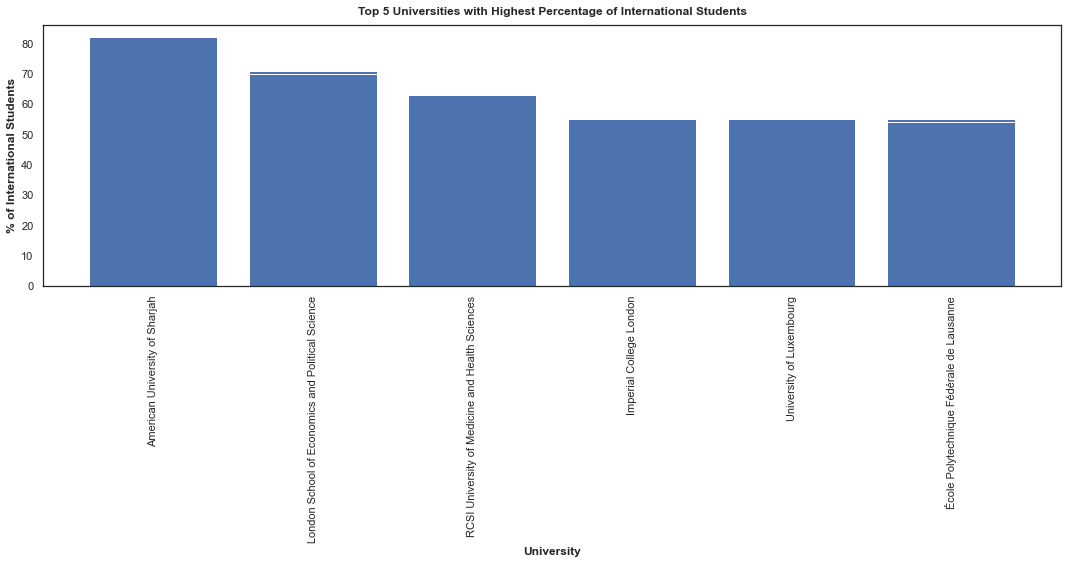

In [400]:
import pandas as pd
import matplotlib.pyplot as plt

data = merged_df

top_5_international = data.sort_values('stats_pc_intl_students', ascending=False).head(10)

plt.figure(figsize=(15, 8))  # set the figure size to 8x6 inches
plt.bar(top_5_international['name'], top_5_international['stats_pc_intl_students'])
plt.xticks(rotation=90)
plt.xlabel('University')
plt.ylabel('% of International Students')
plt.title('Top 5 Universities with Highest Percentage of International Students')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = merged_df

plt.scatter(data['scores_overall'], data['stats_pc_intl_students'])
plt.xlabel('Overall Score')
plt.ylabel('% of International Students')
plt.title('International Student Enrollment vs Overall Score')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = merged_df

plt.scatter(data['scores_teaching'], data['stats_pc_intl_students'])
plt.xlabel('Teaching Score')
plt.ylabel('% of International Students')
plt.title('International Student Enrollment vs Teaching Score')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = merged_df

plt.scatter(data['scores_teaching'], data['stats_pc_intl_students'])
plt.xlabel('Teaching Score')
plt.ylabel('% of International Students')
plt.title('International Student Enrollment vs Teaching Score')
plt.show()


#### Insight: Indicates a strong correlation between Teaching score and International student enrollment. More students apply for univerities that rank weel on 

# Visualizations & Insights Based On 2023 Dataset

## Case Study 2: Year 2023

### 1. Top 10 Universities by Overall Score 2023

In [ ]:
# Replace any special characters with hyphens in the 'students' column
df_2023['stats_number_students'] = df_2023['stats_number_students'].str.replace(',', '')

In [ ]:
#df_2023

In [ ]:
#print(df_2023.dtypes)

In [ ]:
df_2023['rank'] = df_2023['rank'].astype(int)
df_2023['stats_number_students'] = df_2023['stats_number_students'].astype(int)

# Remove the percentage sign and convert to float
df_2023['stats_pc_intl_students'] = df_2023['stats_pc_intl_students'].str.rstrip('%')

df_2023['Date'] = df_2023['Date'].astype(int)
#df_2023['stats_female_male_ratio'] = df_2023['stats_female_male_ratio'].astype(int)
#df_2023['rank'] = df_2023['rank'].astype(int)
print(df_2023.dtypes)
#df_2023

### 2. Top 10 Universities by Overall Score 2023

In [ ]:
import matplotlib.pyplot as plt

# sort by scores_overall and select top 10
top_10 = df_2023.sort_values('scores_overall', ascending=False)[:10]

# create bar plot
plt.barh(top_10['name'], top_10['scores_overall'])

# add labels
plt.title('Top 10 Universities by Overall Score')
plt.xlabel('Overall Score')
plt.ylabel('University Name')

# display plot
plt.show()


In [ ]:
def ratio_to_percentage(ratio_string):
    if isinstance(ratio_string, str) and ':' in ratio_string:
        parts = ratio_string.split(':')
        numerator = float(parts[0].strip())
        denominator = float(parts[1].strip())
        if denominator == 0:
            return 0
        else:
            return round((numerator / denominator) * 100, 2)
    else:
        return ratio_string

# Apply the function to the columns you want to convert
df_2023["stats_female_male_ratio"] = df_2023["stats_female_male_ratio"].apply(ratio_to_percentage)

# Print the result
print(df_2023["stats_female_male_ratio"])


In [ ]:
#df_2023

In [ ]:
# assuming your data frame is named 'df'
table = pd.pivot_table(df_2023, values=['stats_number_students', 'stats_student_staff_ratio', 'stats_pc_intl_students', 'stats_female_male_ratio'], index=['location'], aggfunc={'stats_number_students': 'mean', 'stats_student_staff_ratio': 'mean', 'stats_pc_intl_students': 'mean', 'stats_female_male_ratio': 'mean'})

# print the resulting table
print(table)


### 3. Mean Number Of Students Per Location

In [ ]:
mean_students = df_2023.groupby('location')['stats_number_students'].mean().dropna()
mean_students.plot(kind='barh', figsize=(10, 20))
plt.xlabel('Mean Number of Students')
plt.ylabel('Location')
plt.title('Mean Number of Students per Location')
plt.show()


In [ ]:
mean_students = df_2023.groupby('location')['stats_number_students'].mean()
mean_students.plot(kind='bar', figsize=(20, 10))
plt.show()


### 3. Top 10 Universities Visited By International Students

In [ ]:
top_5_intl_universities = df_2023.sort_values('stats_pc_intl_students', ascending=False).head(10)['name']
print(top_5_intl_universities)


In [ ]:
import matplotlib.pyplot as plt

# create a DataFrame with the number of international students visiting each university
# assuming the DataFrame is named 'df_intl_students'

# sort the DataFrame by the number of international students in descending order
df_intl_students = df_2023[.sort_values(by='stats_pc_intl_students', ascending=False)

# select the top 5 universities visited by international students
top_5 = df_intl_students.head(10)

# create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_5['name'], top_5['stats_pc_intl_students'])

# set the axis labels and chart title
ax.set_xlabel('Number of International Students')
ax.set_ylabel('University')
ax.set_title('Top 5 Universities Visited by International Students')

# show the chart
plt.show()


In [ ]:
df_2023['is_computer_science'] = df_2023['subjects_offered'].str.contains('Computer Science')
cs_2023_universities = df_2023[df_2023['is_computer_science']]
top_cs_universitices_2023 = cs_2023_universities.sort_values(by='rank_order')[:10]
top_cs_universitices_2023[['name', 'rank']]

In [ ]:
#df1['scores_overall'] = pd.to_numeric(df1['scores_overall'])

In [ ]:
# Convert a column to a numeric data type
#df1['Date'] = pd.to_numeric(df1['Date'])
#df1['stats_number_students'] = pd.to_numeric(df1['stats_number_students'])

# Convert a column to a datetime data type
#df['Date'] = pd.to_datetime(df['Date'])


### Scatter plot of international outlook vs. industry income 2023:

In [ ]:
import seaborn as sns

sns.scatterplot(x='scores_industry_income', y='scores_international_outlook', data=df_2023)
plt.xlabel('Industry Income Score')
plt.ylabel('International Outlook Score')
plt.title('Industry Income vs. International Outlook')
plt.show()


### Box plot of student-to-staff ratio by location

In [ ]:
df1

In [ ]:
import matplotlib.pyplot as plt

# Loop through the dataframe and plot the scores of each university
for name, group in df1.groupby('name'):
    plt.plot(group['Date'], group['scores_industry_income'], label=name)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Industry Income Score')

# Set the title of the plot
plt.title('Industry Income Scores of Universities Over Time')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax1 = df1.groupby('Date')['scores_overall'].count().plot(kind='bar', title='Ratings by year', color='#ADD8E6')
fig.tight_layout()

In [ ]:
# Group the data by university and date
grouped_df = df.groupby(['name', 'Date'])['scores_overall'].mean()

# Plot the trend for each university
plt.figure(figsize=(10, 8))
for name, data in grouped_df.groupby('name'):
    plt.plot(data.index.get_level_values('Date'), data.values, label=name)

# Set the plot properties
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Overall Score')
plt.title('Overall Score Trend by University')
plt.show()


In [ ]:
df1['Date']

In [ ]:
df1.head(50)